## Telecom Churn - Case study

## 1. Import required Libraries & Reading the data

In [254]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [256]:
pd.set_option('display.max_rows',230)
pd.set_option('display.max_columns',82)

### Reading the dataset

In [257]:
data = pd.read_csv('C:\\Users\\budha\\datasets\\telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,...,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,...,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,...,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,...,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [258]:
data.shape

(99999, 226)

## Step2 : Data analysis

In [259]:
#Check percentage of missing values for each column -
round(100*(data.isnull().sum()/data.shape[0]),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [260]:
#check if there is any row having all the values missing -
data.isnull().all(axis=1).sum()

0

In [261]:
# Impute 0 for all missing values -
data['date_of_last_rech_6'] = np.where(data['date_of_last_rech_6'].isnull(), 0, 1)
data['date_of_last_rech_7'] = np.where(data['date_of_last_rech_7'].isnull(), 0, 1)
data['date_of_last_rech_8'] = np.where(data['date_of_last_rech_8'].isnull(), 0, 1)
data['date_of_last_rech_9'] = np.where(data['date_of_last_rech_9'].isnull(), 0, 1)

In [262]:
data['date_of_last_rech_6'].dtypes

dtype('int32')

In [263]:
# Impute 0 for all missing values -
data['av_rech_amt_data_6'] = data['av_rech_amt_data_6'].fillna(0)
data['av_rech_amt_data_7'] = data['av_rech_amt_data_7'].fillna(0)
data['av_rech_amt_data_8'] = data['av_rech_amt_data_8'].fillna(0)
data['av_rech_amt_data_9'] = data['av_rech_amt_data_9'].fillna(0)

#### Extract data for High-value customers

In [264]:
data['total_rech_amt_6_7_avg'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2
cutoff = float(data['total_rech_amt_6_7_avg'].quantile([.7]))
data_high = data.loc[data['total_rech_amt_6_7_avg'] >= cutoff]

In [265]:
data_high.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7_avg
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,...,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,...,750.95,11.94,0.0,NaN,0.0,19.83,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,...,0.00,0.00,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.2,NaN,NaN,NaN,0.0,NaN,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,...,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,58.54,0.00,0.00,9.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0


In [266]:
data_high.drop('total_rech_amt_6_7_avg', axis=1, inplace=True)

In [267]:
data_high.shape

(30011, 226)

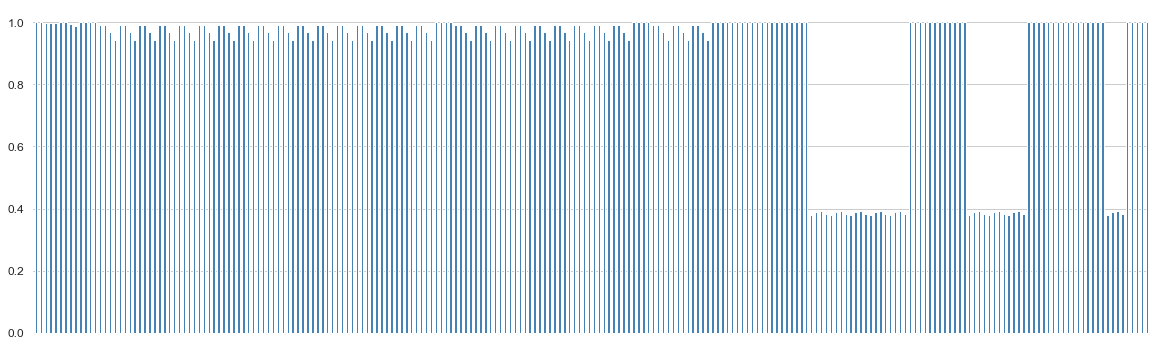

In [268]:
#Visualize the missing data -
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data_high, figsize=(20, 6), fontsize=12, color='steelblue')

In [269]:
data_high.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             30011 non-null  int64  
 1   circle_id                 30011 non-null  int64  
 2   loc_og_t2o_mou            29897 non-null  float64
 3   std_og_t2o_mou            29897 non-null  float64
 4   loc_ic_t2o_mou            29897 non-null  float64
 5   last_date_of_month_6      30011 non-null  object 
 6   last_date_of_month_7      29980 non-null  object 
 7   last_date_of_month_8      29854 non-null  object 
 8   last_date_of_month_9      29651 non-null  object 
 9   arpu_6                    30011 non-null  float64
 10  arpu_7                    30011 non-null  float64
 11  arpu_8                    30011 non-null  float64
 12  arpu_9                    30011 non-null  float64
 13  onnet_mou_6               29695 non-null  float64
 14  onnet

In [270]:
#Check percentage of missing values for each column -
round(100*(data_high.isnull().sum()/data_high.shape[0]),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
last_date_of_month_9         1.20
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
onnet_mou_9                  5.68
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
offnet_mou_9                 5.68
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_ic_mou_9                5.68
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
roam_og_mou_9                5.68
loc_og_t2t_mou

#### Identify Churn customers -

In [271]:
churn_cust = data_high.loc[(data_high.total_ic_mou_9 == 0) & (data_high.total_og_mou_9 == 0) & (data_high.vol_2g_mb_9 == 0) & (data_high.vol_3g_mb_9 == 0), 'mobile_number']

In [272]:
churn_list = list(churn_cust.values)

In [273]:
data_high['churn'] = data_high['mobile_number'].apply(lambda x : 1 if x in churn_list else 0)

In [274]:
#Check percentage of Churn -
data_high['churn'].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

In [275]:
data_high.shape

(30011, 227)

#### Delete all columns for 9th month -

In [276]:
data_high.drop([x for x in data_high if x.endswith('_9')], axis=1, inplace=True)
data_high.drop('sep_vbc_3g', axis=1, inplace=True)

In [277]:
data_high.shape

(30011, 172)

In [278]:
#Get the imformation of the data -
data_high.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 172 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             30011 non-null  int64  
 1   circle_id                 30011 non-null  int64  
 2   loc_og_t2o_mou            29897 non-null  float64
 3   std_og_t2o_mou            29897 non-null  float64
 4   loc_ic_t2o_mou            29897 non-null  float64
 5   last_date_of_month_6      30011 non-null  object 
 6   last_date_of_month_7      29980 non-null  object 
 7   last_date_of_month_8      29854 non-null  object 
 8   arpu_6                    30011 non-null  float64
 9   arpu_7                    30011 non-null  float64
 10  arpu_8                    30011 non-null  float64
 11  onnet_mou_6               29695 non-null  float64
 12  onnet_mou_7               29708 non-null  float64
 13  onnet_mou_8               29073 non-null  float64
 14  offne

In [279]:
#Drop unnecessary columns -
data_high.drop(data_high.loc[:,'circle_id':'last_date_of_month_8'], axis=1, inplace=True)

In [280]:
data_high.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,...,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,...,NaN,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,...,NaN,NaN,0.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.2,NaN,NaN,0.0,0,0,0,0,0,3,0,0,0,0,0,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,511,0.00,2.45,21.89,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,667,0.00,0.00,0.00,0


In [281]:
#Drop unnecessary columns (will consider 'total-....' columns) -
data_high.drop(data_high.loc[:,'onnet_mou_6':'og_others_8'], axis=1, inplace=True)
data_high.drop(data_high.loc[:,'loc_ic_t2t_mou_6':'std_ic_mou_8'], axis=1, inplace=True)
data_high.drop(data_high.loc[:,'spl_ic_mou_6':'ic_others_8'], axis=1, inplace=True)

In [282]:
data_high.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             30011 non-null  int64  
 1   arpu_6                    30011 non-null  float64
 2   arpu_7                    30011 non-null  float64
 3   arpu_8                    30011 non-null  float64
 4   total_og_mou_6            30011 non-null  float64
 5   total_og_mou_7            30011 non-null  float64
 6   total_og_mou_8            30011 non-null  float64
 7   total_ic_mou_6            30011 non-null  float64
 8   total_ic_mou_7            30011 non-null  float64
 9   total_ic_mou_8            30011 non-null  float64
 10  total_rech_num_6          30011 non-null  int64  
 11  total_rech_num_7          30011 non-null  int64  
 12  total_rech_num_8          30011 non-null  int64  
 13  total_rech_amt_6          30011 non-null  int64  
 14  total_

In [283]:
for i in ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']:
    print(i)
    print(data_high[i].value_counts())

date_of_last_rech_6
1    29949
0       62
Name: date_of_last_rech_6, dtype: int64
date_of_last_rech_7
1    29897
0      114
Name: date_of_last_rech_7, dtype: int64
date_of_last_rech_8
1    29417
0      594
Name: date_of_last_rech_8, dtype: int64


In [284]:
#Drop unnecessary columns (will consider 'total-....' columns) -
data_high.drop(data_high.loc[:,'date_of_last_rech_data_6':'date_of_last_rech_data_8'], axis=1, inplace=True)
data_high.drop(data_high.loc[:,'total_rech_data_6':'count_rech_3g_8'], axis=1, inplace=True)

In [285]:
data_high.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mobile_number        30011 non-null  int64  
 1   arpu_6               30011 non-null  float64
 2   arpu_7               30011 non-null  float64
 3   arpu_8               30011 non-null  float64
 4   total_og_mou_6       30011 non-null  float64
 5   total_og_mou_7       30011 non-null  float64
 6   total_og_mou_8       30011 non-null  float64
 7   total_ic_mou_6       30011 non-null  float64
 8   total_ic_mou_7       30011 non-null  float64
 9   total_ic_mou_8       30011 non-null  float64
 10  total_rech_num_6     30011 non-null  int64  
 11  total_rech_num_7     30011 non-null  int64  
 12  total_rech_num_8     30011 non-null  int64  
 13  total_rech_amt_6     30011 non-null  int64  
 14  total_rech_amt_7     30011 non-null  int64  
 15  total_rech_amt_8     30011 non-null 

In [286]:
data_high.loc[:,['arpu_3g_6','arpu_3g_7','arpu_3g_8']].describe()

,arpu_3g_6,arpu_3g_7,arpu_3g_8
count,11397.000000,11662.000000,11754.000000
mean,142.191067,143.817963,133.098754
std,255.296779,259.492088,240.334682
min,-30.280000,-26.040000,-20.040000
25%,0.000000,0.000000,0.000000
50%,22.070000,21.910000,11.415000
75%,212.170000,212.170000,212.170000
max,6362.280000,4980.900000,3716.900000


In [287]:
#Drop unnecessary columns -
data_high.drop(data_high.loc[:,'arpu_3g_6':'night_pck_user_8'], axis=1, inplace=True)
data_high.drop(data_high.loc[:,'fb_user_6':'fb_user_8'], axis=1, inplace=True)

In [288]:
data_high.shape

(30011, 51)

In [289]:
#Check percentage of missing values for each column -
round(100*(data_high.isnull().sum()/data_high.shape[0]),2)

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
total_og_mou_6         0.0
total_og_mou_7         0.0
total_og_mou_8         0.0
total_ic_mou_6         0.0
total_ic_mou_7         0.0
total_ic_mou_8         0.0
total_rech_num_6       0.0
total_rech_num_7       0.0
total_rech_num_8       0.0
total_rech_amt_6       0.0
total_rech_amt_7       0.0
total_rech_amt_8       0.0
max_rech_amt_6         0.0
max_rech_amt_7         0.0
max_rech_amt_8         0.0
date_of_last_rech_6    0.0
date_of_last_rech_7    0.0
date_of_last_rech_8    0.0
last_day_rch_amt_6     0.0
last_day_rch_amt_7     0.0
last_day_rch_amt_8     0.0
av_rech_amt_data_6     0.0
av_rech_amt_data_7     0.0
av_rech_amt_data_8     0.0
vol_2g_mb_6            0.0
vol_2g_mb_7            0.0
vol_2g_mb_8            0.0
vol_3g_mb_6            0.0
vol_3g_mb_7            0.0
vol_3g_mb_8            0.0
monthly_2g_6           0.0
monthly_2g_7           0.0
monthly_2g_8           0.0
s

#### Derive new features -

In [290]:
data_high['total_og_ic_mou_6'] = data_high['total_og_mou_6'] + data_high['total_ic_mou_6']
data_high['total_og_ic_mou_7'] = data_high['total_og_mou_7'] + data_high['total_ic_mou_7']
data_high['total_og_ic_mou_8'] = data_high['total_og_mou_8'] + data_high['total_ic_mou_8']

In [291]:
data_high['change_in_mou'] = data_high['total_ic_mou_8'] - (((data_high['total_ic_mou_6'] + data_high['total_ic_mou_7'])/2).apply(np.ceil))
data_high['change_og_mou'] = data_high['total_og_mou_8'] - (((data_high['total_og_mou_6'] + data_high['total_og_mou_7'])/2).apply(np.ceil))

In [292]:
data_high['change_in_og_ic_mou'] = data_high['total_og_ic_mou_8'] - (((data_high['total_og_ic_mou_6'] + data_high['total_og_ic_mou_7'])/2).apply(np.ceil))

In [293]:
data_high.shape

(30011, 57)

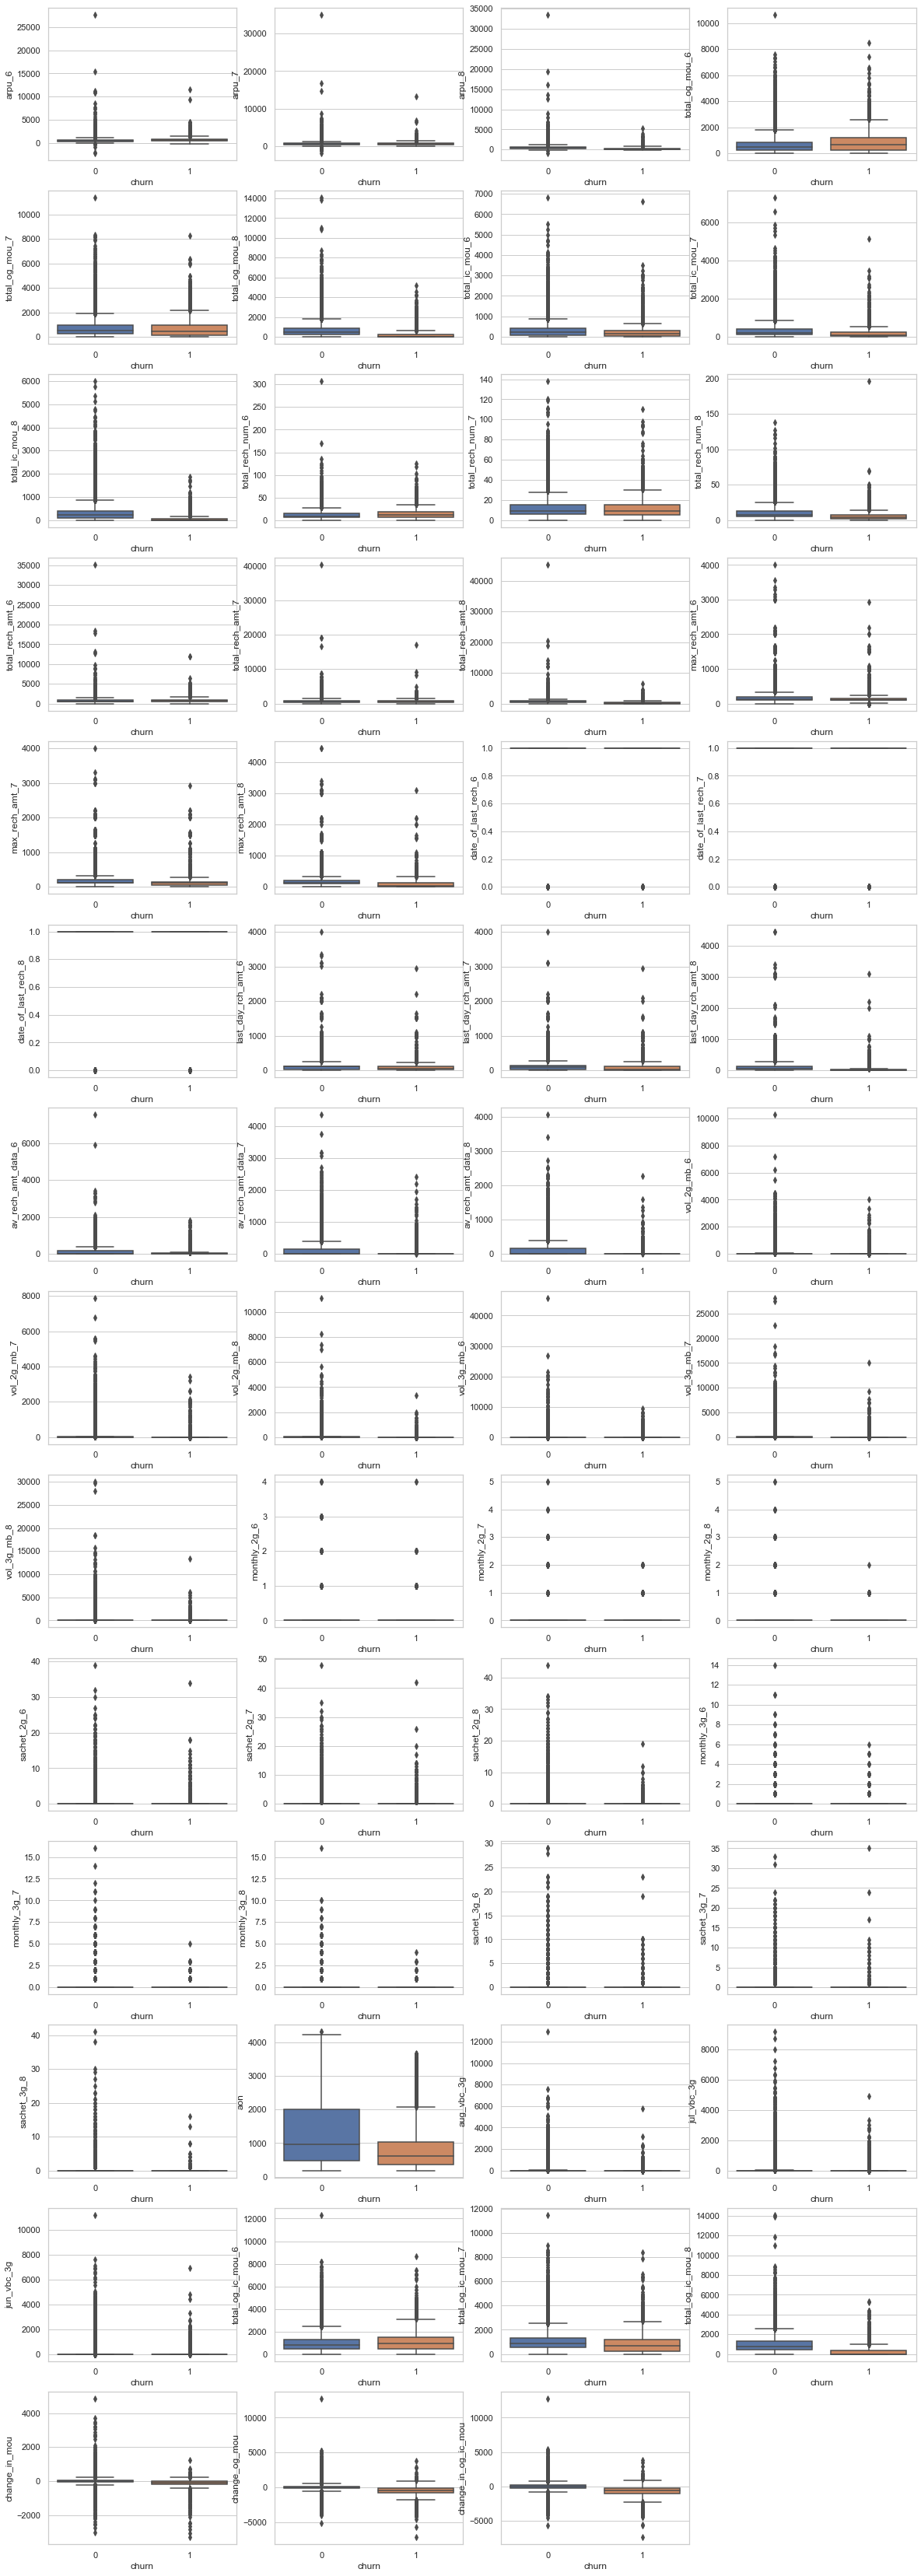

In [294]:
## Visualize data against the Target -
data_num = [x for x in data_high.columns if x not in  ['mobile_number','churn']]
plt.figure(figsize=(20, 60))
for i,v in enumerate(data_num):
    plt.subplot(14,4,i+1)
    sns.set(style="whitegrid")
    sns.boxplot(y=data_high[v],x = data_high['churn'])

In [295]:
data_high.drop('mobile_number', axis=1, inplace=True)

In [296]:
#Drop below columns since we are considering 'og + ic' data -
#data_high.drop('total_og_mou_6', axis=1, inplace=True)
#data_high.drop('total_og_mou_7', axis=1, inplace=True)
#data_high.drop('total_ic_mou_6', axis=1, inplace=True)
#data_high.drop('total_ic_mou_7', axis=1, inplace=True)
#data_high.drop('total_ic_mou_8', axis=1, inplace=True)
#data_high.drop('total_og_mou_8', axis=1, inplace=True)

In [297]:
# Derive new features
data_high['change_in_rech_num'] = data_high['total_rech_num_8'] - (((data_high['total_rech_num_6'] + data_high['total_rech_num_7'])/2).apply(np.ceil))
data_high['change_in_rech_amt'] = data_high['total_rech_amt_8'] - (((data_high['total_rech_amt_6'] + data_high['total_rech_amt_7'])/2).apply(np.ceil))

In [298]:
data_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   arpu_6               30011 non-null  float64
 1   arpu_7               30011 non-null  float64
 2   arpu_8               30011 non-null  float64
 3   total_og_mou_6       30011 non-null  float64
 4   total_og_mou_7       30011 non-null  float64
 5   total_og_mou_8       30011 non-null  float64
 6   total_ic_mou_6       30011 non-null  float64
 7   total_ic_mou_7       30011 non-null  float64
 8   total_ic_mou_8       30011 non-null  float64
 9   total_rech_num_6     30011 non-null  int64  
 10  total_rech_num_7     30011 non-null  int64  
 11  total_rech_num_8     30011 non-null  int64  
 12  total_rech_amt_6     30011 non-null  int64  
 13  total_rech_amt_7     30011 non-null  int64  
 14  total_rech_amt_8     30011 non-null  int64  
 15  max_rech_amt_6       30011 non-null 

In [299]:
data_high['change_in_vol_2g'] = data_high['vol_2g_mb_8'] - (data_high['vol_2g_mb_6'] + data_high['vol_2g_mb_7'])/2
data_high['change_in_vol_3g'] = data_high['vol_3g_mb_8'] - (data_high['vol_3g_mb_6'] + data_high['vol_3g_mb_7'])/2

In [300]:
# Derive new features
data_high['change_av_rech_amt_data'] = data_high['av_rech_amt_data_8'] - (((data_high['av_rech_amt_data_6'] + data_high['av_rech_amt_data_6'])/2).apply(np.ceil))

In [301]:
# Derive new features
data_high['change_arpu'] = data_high['arpu_8'] - (((data_high['arpu_6'] + data_high['arpu_7'])/2).apply(np.ceil))

In [302]:
# Derive new features
data_high['total_monthly_2g_3g_6'] = data_high['monthly_2g_6'] + data_high['monthly_3g_6'] 
data_high['total_monthly_2g_3g_7'] = data_high['monthly_2g_7'] + data_high['monthly_3g_7'] 
data_high['total_monthly_2g_3g_8'] = data_high['monthly_2g_8'] + data_high['monthly_3g_8'] 

data_high['change_monthly_2g_3g'] = data_high['total_monthly_2g_3g_8'] - (((data_high['total_monthly_2g_3g_6'] + data_high['total_monthly_2g_3g_7'])/2).apply(np.ceil))

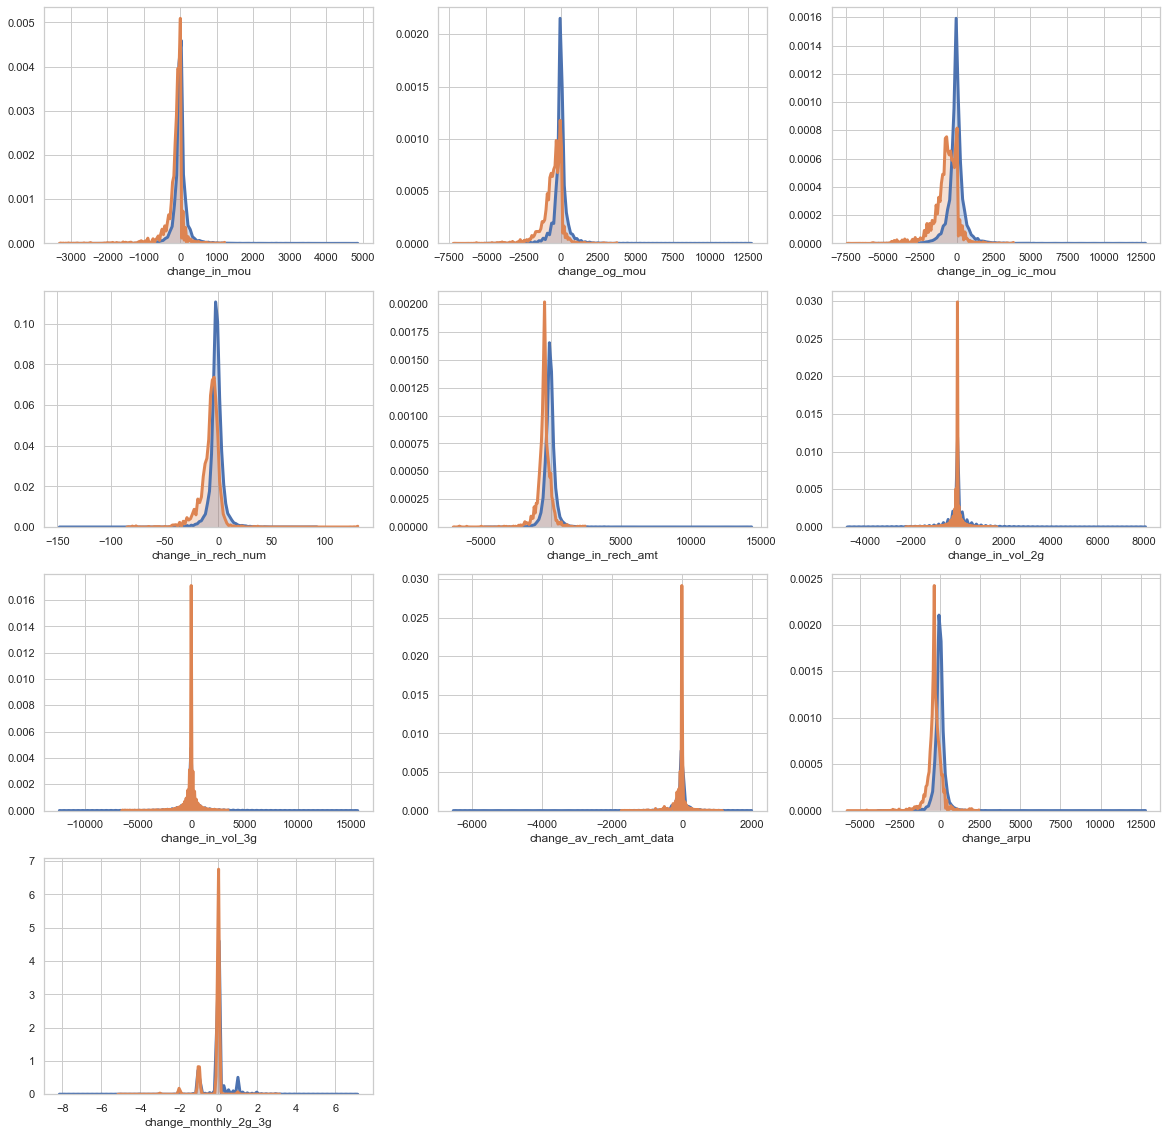

In [303]:
## Visualize the derived features -
change_cols = ['change_in_mou','change_og_mou','change_in_og_ic_mou','change_in_rech_num','change_in_rech_amt',
               'change_in_vol_2g','change_in_vol_3g','change_av_rech_amt_data','change_arpu','change_monthly_2g_3g']
#               'change_monthly_2g_3g', 'change_monthly_2g','change_monthly_3g','change_vbc_3g']

#plt.figure(figsize=(20, 30))
plt.figure(figsize=(20, 20))
for i,v in enumerate(change_cols):
    b = data_high.loc[data_high.churn == 0 , v]
    m = data_high.loc[data_high.churn == 1 , v]
    plt.subplot(4,3,i+1)
    sns.distplot(b,kde_kws={'bw': 0.05, 'shade': True, 'linewidth': 3}, hist = False, kde = True)
    sns.distplot(m,kde_kws={'bw': 0.05, 'shade': True, 'linewidth': 3}, hist = False, kde = True)

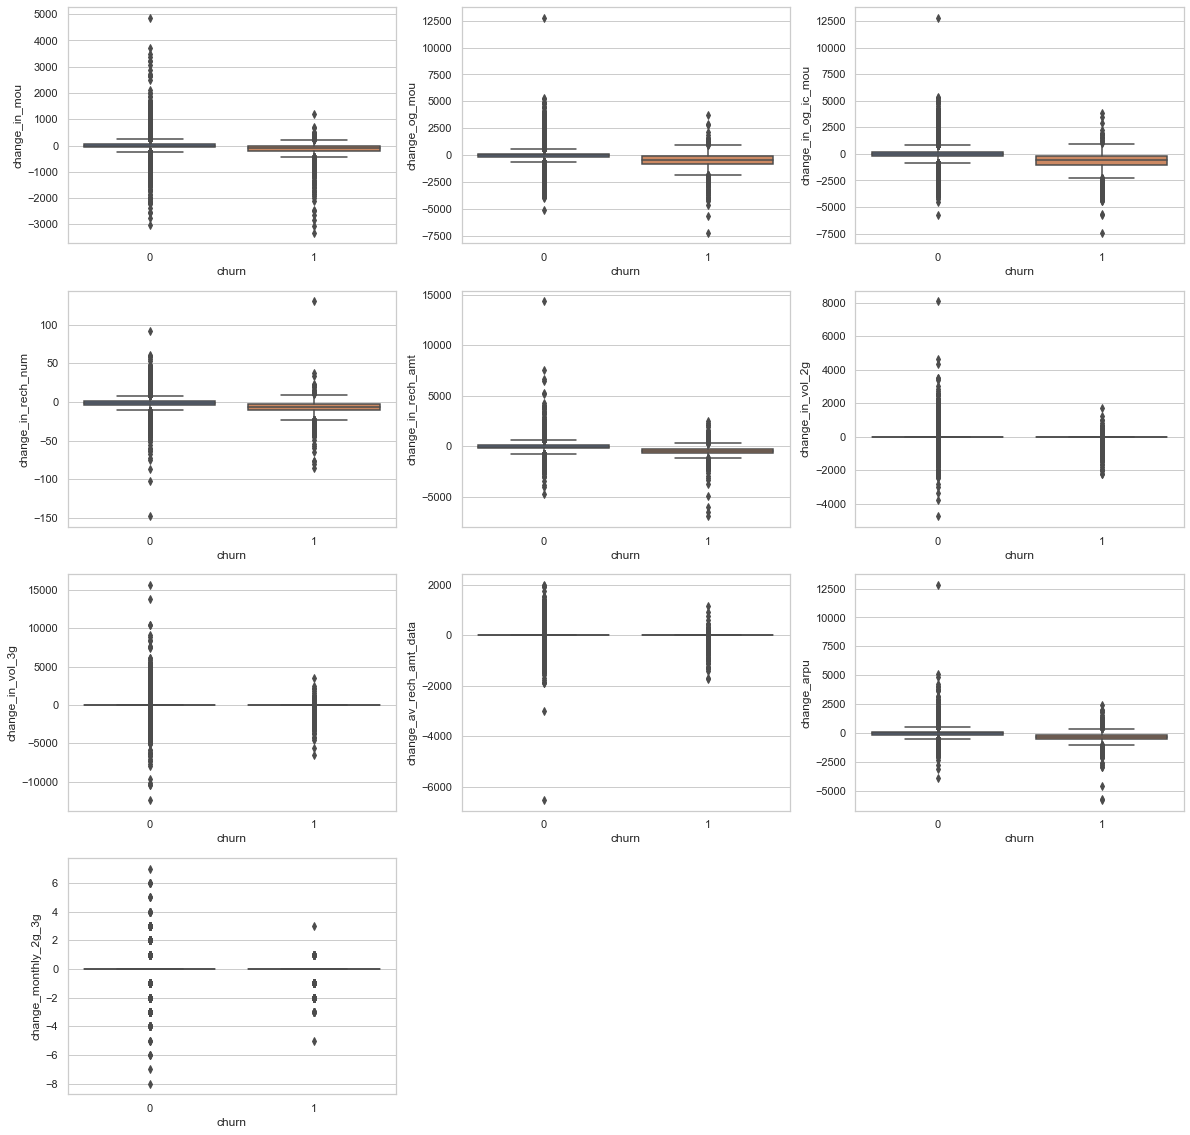

In [304]:
## Visualize the derived features -
change_cols = ['change_in_mou','change_og_mou','change_in_og_ic_mou','change_in_rech_num','change_in_rech_amt',
               'change_in_vol_2g','change_in_vol_3g','change_av_rech_amt_data','change_arpu','change_monthly_2g_3g']
#               'change_monthly_2g_3g','change_monthly_2g','change_monthly_3g','change_vbc_3g']
plt.figure(figsize=(20, 20))
for i,v in enumerate(change_cols):
    plt.subplot(4,3,i+1)
    sns.set(style="whitegrid")
    sns.boxplot(y=data_high[v],x = data_high['churn'])

In [305]:
data_high.describe()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,total_og_ic_mou_6,total_og_ic_mou_7,total_og_ic_mou_8,change_in_mou,change_og_mou,change_in_og_ic_mou,change_in_rech_num,change_in_rech_amt,change_in_vol_2g,change_in_vol_3g,change_av_rech_amt_data,change_arpu,total_monthly_2g_3g_6,total_monthly_2g_3g_7,total_monthly_2g_3g_8,change_monthly_2g_3g
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,686.697541,709.124730,623.774684,307.512073,314.875472,295.426531,12.121322,11.913465,10.225317,697.365833,695.962880,613.638799,171.414048,175.661058,162.869348,0.997934,0.996201,0.980207,104.485655,105.287128,95.653294,90.728204,97.545627,89.762766,78.859009,78.171382,69.209105,258.392681,278.093737,269.864111,0.124854,0.131352,0.114058,0.500383,0.587185,0.607611,0.173903,0.185132,0.173203,0.137916,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,0.086402,994.209614,1024.000202,919.201215,-16.260217,-74.629535,-90.395833,-2.042651,-83.196894,-9.306090,1.620902,-0.966333,-53.852107,0.298757,0.316484,0.287261,-0.099197
std,442.722413,462.897814,492.259586,660.356820,685.071178,685.983313,361.159561,369.654489,360.343153,9.543550,9.605532,9.478572,539.325984,562.143146,601.821630,174.703215,181.545389,172.605809,0.045406,0.061517,0.139290,142.767207,141.148386,145.260363,191.190963,198.351762,185.812445,277.445058,280.331857,268.494284,866.195376,855.682340,859.299266,0.374512,0.387673,0.357272,1.699665,1.900461,1.844444,0.574285,0.620418,0.582932,0.875528,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,0.280961,791.192251,810.085414,824.726495,223.524587,522.993513,625.875356,6.952256,424.894157,218.200488,574.372021,162.697558,341.134687,0.672677,0.715889,0.670722,0.565405
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3317.000000,-7214.000000,-7413.000000,-148.000000,-6950.000000,-4740.925000,-12385.505000,-6528.000000,-5812.000000,0.000000,0.000000,0.000000,-8.000000
25%,364.161000,365.004500,289.609500,266.170000,275.045000,188.790000,89.975000,98.820000,78.930000,6.000000,6.000000,4.000000,432.0

#### Outlier treatment

In [306]:
data_high.loc[data_high.change_in_rech_num > 100, 'change_in_rech_num'] = 20
data_high = data_high[~(data_high.change_in_og_ic_mou > 12000)]
data_high = data_high[~((data_high.change_in_rech_num > 90) | (data_high.change_in_rech_num < -140))]
data_high = data_high[~(data_high.change_arpu > 10000)]

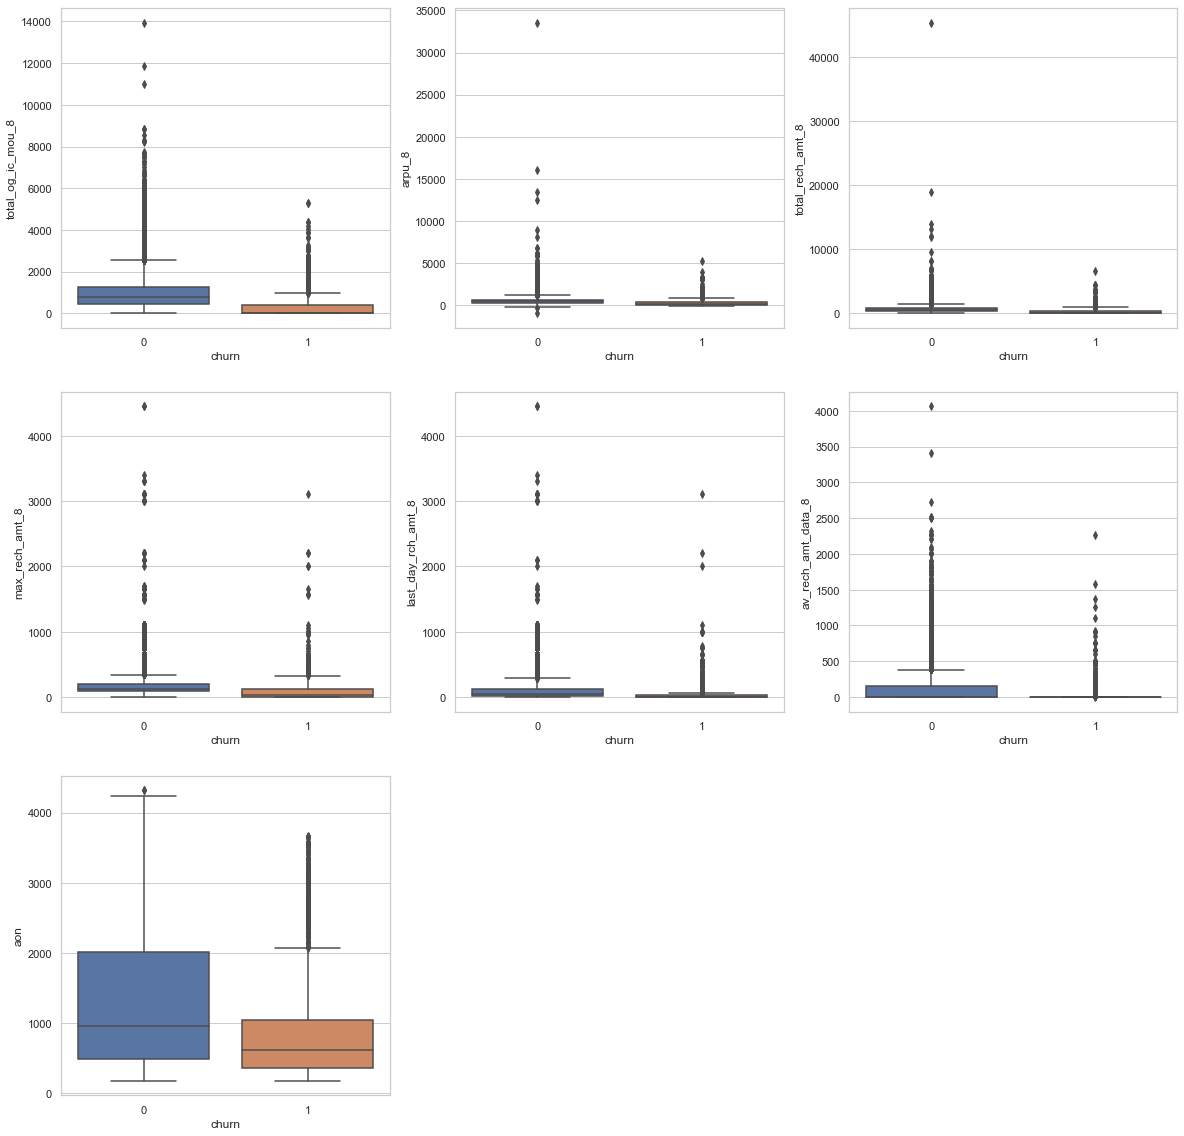

In [307]:
# Visualize important columns -
change_cols = ['total_og_ic_mou_8','arpu_8','total_rech_amt_8','max_rech_amt_8',
               'last_day_rch_amt_8','av_rech_amt_data_8','aon']

plt.figure(figsize=(20, 20))
for i,v in enumerate(change_cols):
    plt.subplot(3,3,i+1)
    sns.set(style="whitegrid")
    sns.boxplot(y=data_high[v],x = data_high['churn'])

In [308]:
data_high = data_high[~((data_high.total_og_ic_mou_8 >10000) & (data_high.churn == 0))]
data_high.loc[((data_high.total_og_ic_mou_8 > 2500) & (data_high.churn == 1)), 'total_og_ic_mou_8'] = 2500
data_high = data_high[~(data_high.arpu_8 > 10000)]

In [309]:
data_high.loc[data_high.churn == 1 ,'arpu_8'].describe()

count    2593.000000
mean      243.063343
std       378.843531
min       -37.887000
25%         0.000000
50%       101.894000
75%       351.028000
max      5228.826000
Name: arpu_8, dtype: float64

In [310]:
data_high.loc[((data_high.arpu_8 > 1000) & (data_high.churn == 1)) ,'arpu_8'] = 1000
data_high = data_high.loc[~(data_high.total_rech_amt_8 > 6000)]

In [311]:
data_high.loc[data_high.churn == 1 ,'total_rech_amt_8'].describe()

count    2592.000000
mean      256.422068
std       427.340104
min         0.000000
25%         0.000000
50%        61.000000
75%       378.000000
max      4467.000000
Name: total_rech_amt_8, dtype: float64

In [312]:
data_high.loc[((data_high.total_rech_amt_8 > 2000) & (data_high.churn == 1)) ,'total_rech_amt_8'] = 2000
data_high.loc[((data_high.max_rech_amt_8 > 2000) & (data_high.churn == 0)), 'max_rech_amt_8'] = 2000
data_high.loc[((data_high.max_rech_amt_8 > 1000) & (data_high.churn == 1)), 'max_rech_amt_8'] = 1000
data_high = data_high.loc[~((data_high.last_day_rch_amt_8 > 2000) & (data_high.churn == 0))]
data_high.loc[((data_high.last_day_rch_amt_8 > 1000) & (data_high.churn == 1)) , 'last_day_rch_amt_8'] = 1000
data_high.loc[((data_high.av_rech_amt_data_8 > 2000) & (data_high.churn == 0)), 'av_rech_amt_data_8'] = 2000
data_high.loc[((data_high.av_rech_amt_data_8 > 1000) & (data_high.churn == 1)), 'av_rech_amt_data_8'] = 1000

In [313]:
data_high.loc[data_high.churn == 1 ,'aon'].describe(percentiles=[.75,.80,.95,.99])

count    2592.000000
mean      869.133488
std       747.769069
min       180.000000
50%       614.500000
75%      1041.250000
80%      1195.000000
95%      2687.800000
99%      3423.070000
max      3670.000000
Name: aon, dtype: float64

In [314]:
data_high.loc[((data_high.aon > 2600) & (data_high.churn == 1)), 'aon'] = 2600

## Step 3: Splitting the Data into Training and Testing Sets & Scaling

#### Dividing into X and Y sets for the model building

In [315]:
X = data_high.drop('churn', axis=1)
y = data_high['churn']

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [317]:
print(X_train.shape, y_train.shape) 

(23982, 65) (23982,)


#### Scaling

In [318]:
from sklearn.preprocessing import MinMaxScaler

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
 
scaler = MinMaxScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
scaled_X_train.columns=X_train_cols
scaled_X_test.columns =X_test_cols

In [319]:
print(len(scaled_X_train), len(y_train)) 

23982 23982


## Below code is using class_weight for Logistic Regression (without SMOTE)

In [150]:
logreg = LogisticRegression(random_state=0)
model_fit(logreg, scaled_X_train, y_train, scaled_X_test, y_test)

CV Score : Mean - 0.8784694 | Std - 0.006161607 | Min - 0.8701675 | Max - 0.8860607
Train AUC Score: 0.881722
Train Recall Score : 0.223073
F1 Recall Score : 0.338294
******* Train Confusion Matrix *********
[[21693   200]
 [ 1623   466]]
******* Train Classification Report *********
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     21893
           1       0.70      0.22      0.34      2089

    accuracy                           0.92     23982
   macro avg       0.82      0.61      0.65     23982
weighted avg       0.91      0.92      0.91     23982


Test AUC Score : 0.887746
Test Recall Score : 0.206759
F1 Recall Score : 0.314199
******* Test Confusion Matrix *********
[[5438   55]
 [ 399  104]]

******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5493
           1       0.65      0.21      0.31       503

    accuracy                

In [252]:
print(np.linspace(0.05, 0.98, 20))

[0.05       0.09894737 0.14789474 0.19684211 0.24578947 0.29473684
 0.34368421 0.39263158 0.44157895 0.49052632 0.53947368 0.58842105
 0.63736842 0.68631579 0.73526316 0.78421053 0.83315789 0.88210526
 0.93105263 0.98      ]


In [253]:
x = [{0: x, 1: 1.0-x} for x in weights]
x

[{0: 0.05, 1: 0.95},
 {0: 0.15555555555555556, 1: 0.8444444444444444},
 {0: 0.2611111111111111, 1: 0.7388888888888889},
 {0: 0.36666666666666664, 1: 0.6333333333333333},
 {0: 0.4722222222222222, 1: 0.5277777777777778},
 {0: 0.5777777777777778, 1: 0.42222222222222217},
 {0: 0.6833333333333333, 1: 0.31666666666666665},
 {0: 0.788888888888889, 1: 0.21111111111111103},
 {0: 0.8944444444444445, 1: 0.10555555555555551},
 {0: 1.0, 1: 0.0}]

In [151]:
weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
                    estimator=LogisticRegression(random_state=0),
                    param_grid={'class_weight': [{0: x, 1: 1.0-x} for x in weights]},
                    scoring='f1',
                    cv=5
                  )

grid_result = gsc.fit(scaled_X_train, y_train)

In [152]:
# examine the best model
print(gsc.best_score_)
print(gsc.best_params_)
print(gsc.best_estimator_)

0.5398892472623235
{'class_weight': {0: 0.19210526315789472, 1: 0.8078947368421052}}
LogisticRegression(class_weight={0: 0.19210526315789472, 1: 0.8078947368421052},
                   random_state=0)


In [153]:
# cv results
cv_results = pd.DataFrame(gsc.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.223802,0.020793,0.003989,8.844012e-07,"{0: 0.05, 1: 0.95}","{'class_weight': {0: 0.05, 1: 0.95}}",0.315616,0.303375,0.309705,0.309929,0.323619,0.312449,0.006797,10
1,0.239959,0.006542,0.004389,4.880915e-04,"{0: 0.09736842105263158, 1: 0.9026315789473685}","{'class_weight': {0: 0.09736842105263158, 1: 0...",0.460372,0.447525,0.444596,0.447967,0.441135,0.448319,0.006504,6
2,0.214028,0.025022,0.003990,4.156970e-07,"{0: 0.14473684210526316, 1: 0.8552631578947368}","{'class_weight': {0: 0.14473684210526316, 1: 0...",0.536232,0.518707,0.519231,0.522374,0.500447,0.519398,0.011418,3


In [154]:
cv_results = cv_results.loc[:,['param_class_weight','mean_test_score']]
cv_results.sort_values(by='mean_test_score', ascending=False, inplace=True)
cv_results

,param_class_weight,mean_test_score
3,"{0: 0.19210526315789472, 1: 0.8078947368421052}",0.539889
4,"{0: 0.23947368421052628, 1: 0.7605263157894737}",0.535787
2,"{0: 0.14473684210526316, 1: 0.8552631578947368}",0.519398
5,"{0: 0.28684210526315784, 1: 0.7131578947368422}",0.512009
6,"{0: 0.33421052631578946, 1: 0.6657894736842105}",0.470283
1,"{0: 0.09736842105263158, 1: 0.9026315789473685}",0.448319
7,"{0: 0.381578947368421, 1: 0.618421052631579}",0.415795
8,"{0: 0.4289473684210526, 1: 0.5710526315789475}",0.367290
9,"{0: 0.47631578947368414, 1: 0.5236842105263159}",0.318368
0,"{0: 0.05, 1: 0.95}",0.312449


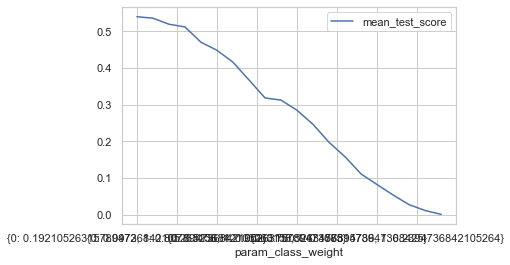

In [155]:
cv_results.plot(x='param_class_weight', y='mean_test_score')

In [320]:
#logreg = gsc.best_estimator_
logreg = LogisticRegression(class_weight={0: 0.19210526315789472, 1: 0.8078947368421052}, random_state=0)
model_fit(logreg, scaled_X_train, y_train, scaled_X_test, y_test)

CV Score : Mean - 0.8779402 | Std - 0.006288238 | Min - 0.8692659 | Max - 0.8865169
Train AUC Score: 0.881191
Train Recall Score : 0.639540
F1 Recall Score : 0.544639
******* Train Confusion Matrix *********
[[20412  1481]
 [  753  1336]]
******* Train Classification Report *********
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     21893
           1       0.47      0.64      0.54      2089

    accuracy                           0.91     23982
   macro avg       0.72      0.79      0.75     23982
weighted avg       0.92      0.91      0.91     23982


Test AUC Score : 0.886497
Test Recall Score : 0.650099
F1 Recall Score : 0.558020
******* Test Confusion Matrix *********
[[5151  342]
 [ 176  327]]

******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5493
           1       0.49      0.65      0.56       503

    accuracy                

## End of class_weight experiment

## Step 4: Apply ADASYN for class imbalance

In [245]:
from collections import Counter
counter = Counter(y_train)
class_0 = counter[0]
class_1 = counter[1]
print(counter)
print(class_0, class_1)
print(class_1/class_0)

Counter({0: 21893, 1: 2089})
21893 2089
0.09541862695838853


In [68]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN(random_state=42)
scaled_X_train1, y_train1 = oversample.fit_resample(scaled_X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train1)
print(counter)

Counter({0: 21893, 1: 21697})


In [69]:
print(scaled_X_train.shape, y_train.shape)
print(scaled_X_train1.shape, y_train1.shape)

(23982, 65) (23982,)
(43590, 65) (43590,)


https://www.kaggle.com/eikedehling/exploring-class-imbalance-resampling-and-weights

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

``sampling_strategy``:float, str, dict or callable, (default=’auto’)<br>
Sampling information to resample the data set.

When float, it corresponds to the **desired ratio** of the number of samples in the minority class over the number of samples in the majority class after resampling. Therefore, the ratio is expressed as \alpha_{os} = N_{rm} / N_{M} where N_{rm} is the number of samples in the minority class after resampling and N_{M} is the number of samples in the majority class.

In [224]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.37,random_state=42)
scaled_X_train1, y_train1 = oversample.fit_resample(scaled_X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train1)
print(counter)

Counter({0: 21893, 1: 8100})


In [228]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=1,random_state=42)
scaled_X_train1, y_train1 = oversample.fit_resample(scaled_X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train1)
print(counter)

Counter({0: 21893, 1: 21893})


In [ ]:
#pipe = Pipeline(steps=[('smote',ADASYN(random_state=42)),('logreg',LogisticRegression(random_state=0))])
#pipe = Pipeline(steps=[('smote',SMOTE(random_state=42)),('logreg',LogisticRegression(random_state=0))])

In [195]:
weights = np.linspace(0.05, 0.1, 10)
#x = {'smote__ratio': [{0: int(num_neg), 1: int(num_neg * w) } for w in weights]}
x = {'smote__ratio':weights}
x

{'smote__ratio': array([0.05      , 0.05555556, 0.06111111, 0.06666667, 0.07222222,
        0.07777778, 0.08333333, 0.08888889, 0.09444444, 0.1       ])}

In [188]:
print(np.linspace(1, 10, 10))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [196]:
from imblearn.over_sampling import ADASYN
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#pipe = make_pipeline([('sm',SMOTE()),('logreg',LogisticRegression())])
#pipe = Pipeline([('sampling', SMOTE()),('classification', LogisticRegression())])

pipe = make_pipeline(SMOTE(),LogisticRegression())

weights = np.linspace(0.05, 1, 10)

#pipe.fit(scaled_X_train, y_train)

gsc = GridSearchCV(
                    estimator=pipe,
                    param_grid={
                                #'smote__ratio': [{0: int(num_neg), 1: int(num_neg * w) } for w in weights]
                                #'sm__ratio': weights
                                'smote__sampling_strategy': weights
                                #'sampling__ratio': weights
                               },
                    scoring='f1',
                    cv=5
                  )

gsc.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'smote__sampling_strategy': array([0.05      , 0.15555556, 0.26111111, 0.36666667, 0.47222222,
       0.57777778, 0.68333333, 0.78888889, 0.89444444, 1.        ])},
             scoring='f1')

In [197]:
# examine the best model
print(gsc.best_score_)
print(gsc.best_params_)
print(gsc.best_estimator_)

0.553579222524204
{'smote__sampling_strategy': 0.36666666666666664}
Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.36666666666666664)),
                ('logisticregression', LogisticRegression())])


In [198]:
# cv results
cv_results = pd.DataFrame(gsc.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_smote__sampling_strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011578,0.000483,0.000000,0.000000,0.05,{'smote__sampling_strategy': 0.05},NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,0.556512,0.047889,0.004588,0.000489,0.155556,{'smote__sampling_strategy': 0.15555555555555556},0.477306,0.461988,0.490141,0.458462,0.472834,0.472146,0.011326,7
2,0.577057,0.043140,0.004388,0.000488,0.261111,{'smote__sampling_strategy': 0.2611111111111111},0.551237,0.555056,0.563574,0.540541,0.553672,0.552816,0.007412,2


In [201]:
cv_results = cv_results.loc[:,['param_smote__sampling_strategy','mean_test_score']]
cv_results.sort_values(by='param_smote__sampling_strategy', ascending=True, inplace=True)
cv_results

,param_smote__sampling_strategy,mean_test_score
0,0.05,NaN
1,0.155556,0.472146
2,0.261111,0.552816
3,0.366667,0.553579
4,0.472222,0.535963
5,0.577778,0.521801
6,0.683333,0.499122
7,0.788889,0.476989
8,0.894444,0.455644
9,1,0.438574


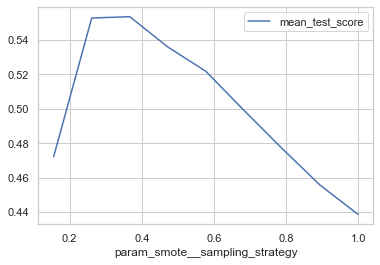

In [202]:
cv_results.plot(x='param_smote__sampling_strategy', y='mean_test_score')

In [204]:
pipe = make_pipeline(SMOTE(sampling_strategy=0.37),LogisticRegression(random_state=0))

# Fit..
#pipe.fit(X_train, y_train)
model_fit(pipe, scaled_X_train, y_train, scaled_X_test, y_test)

CV Score : Mean - 0.8835969 | Std - 0.005737759 | Min - 0.8751303 | Max - 0.891283
Train AUC Score: 0.887086
Train Recall Score : 0.663475
F1 Recall Score : 0.558758
******* Train Confusion Matrix *********
[[20407  1486]
 [  703  1386]]
******* Train Classification Report *********
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     21893
           1       0.48      0.66      0.56      2089

    accuracy                           0.91     23982
   macro avg       0.72      0.80      0.75     23982
weighted avg       0.92      0.91      0.92     23982


Test AUC Score : 0.895487
Test Recall Score : 0.689861
F1 Recall Score : 0.575934
******* Test Confusion Matrix *********
[[5138  355]
 [ 156  347]]

******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5493
           1       0.49      0.69      0.58       503

    accuracy                 

In [242]:
from imblearn.pipeline import Pipeline
#pipe = make_pipeline(SMOTE(),LogisticRegression())
pipe = Pipeline(steps=[('smote',SMOTE()),('logisticregression',LogisticRegression())])

k_values = list(range(5,25,5))

#pipe.fit(scaled_X_train, y_train)
#params = {'sampling__k_neighbors': list(range(5,25,5))}

gsc = GridSearchCV(
                    estimator=pipe,
                    param_grid={'smote__k_neighbors': k_values},
                    scoring='f1',
                    cv=5
                  )

gsc.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'smote__k_neighbors': [5, 10, 15, 20]}, scoring='f1')

In [235]:
from imblearn.pipeline import make_pipeline

pipe = make_pipeline(SMOTE(),LogisticRegression())
#pipe = Pipeline(steps=[('sampling',SMOTE()),('logreg',LogisticRegression())])

k_values = list(range(5,25,5))

#pipe.fit(scaled_X_train, y_train)
#params = [{'sampling__k_neighbors': list(range(5,25,5)}]

gsc = GridSearchCV(
                    estimator=pipe,
                    param_grid={
                                'smote__k_neighbors': k_values
                                #'sampling__k_neighbors': k_values
                               },
                    scoring='f1',
                    cv=5
                  )

gsc.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'smote__k_neighbors': [5, 10, 15, 20]}, scoring='f1')

In [207]:
# examine the best model
print(gsc.best_score_)
print(gsc.best_params_)
print(gsc.best_estimator_)

0.4402558309103024
{'smote__k_neighbors': 10}
Pipeline(steps=[('smote', SMOTE(k_neighbors=10)),
                ('logisticregression', LogisticRegression())])


In [208]:
# cv results
cv_results = pd.DataFrame(gsc.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_smote__k_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.856908,0.018055,0.005785,0.001164,5,{'smote__k_neighbors': 5},0.447781,0.424691,0.433938,0.448819,0.441039,0.439254,0.009030,4
1,0.841150,0.051254,0.005186,0.000399,10,{'smote__k_neighbors': 10},0.452756,0.422086,0.434951,0.449409,0.442077,0.440256,0.010969,1
2,0.821803,0.016291,0.004787,0.000746,15,{'smote__k_neighbors': 15},0.450262,0.428040,0.434613,0.442270,0.444296,0.439896,0.007758,3


In [209]:
cv_results = cv_results.loc[:,['param_smote__k_neighbors','mean_test_score']]
cv_results.sort_values(by='param_smote__k_neighbors', ascending=True, inplace=True)
cv_results

,param_smote__k_neighbors,mean_test_score
0,5,0.439254
1,10,0.440256
2,15,0.439896
3,20,0.440185


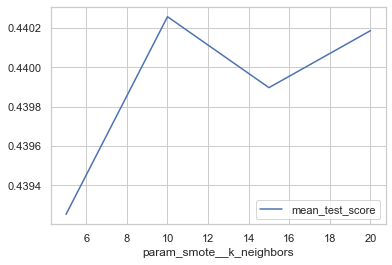

In [211]:
cv_results.plot(x='param_smote__k_neighbors', y='mean_test_score')

In [215]:
pipe = make_pipeline(SMOTE(k_neighbors=10),LogisticRegression(random_state=0))

# Fit..
#pipe.fit(X_train, y_train)
model_fit(pipe, scaled_X_train, y_train, scaled_X_test, y_test)

CV Score : Mean - 0.8848892 | Std - 0.004935479 | Min - 0.8769402 | Max - 0.8903155
Train AUC Score: 0.889619
Train Recall Score : 0.819531
F1 Recall Score : 0.442434
******* Train Confusion Matrix *********
[[17955  3938]
 [  377  1712]]
******* Train Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     21893
           1       0.30      0.82      0.44      2089

    accuracy                           0.82     23982
   macro avg       0.64      0.82      0.67     23982
weighted avg       0.92      0.82      0.85     23982


Test AUC Score : 0.900035
Test Recall Score : 0.827038
F1 Recall Score : 0.448518
******* Test Confusion Matrix *********
[[4557  936]
 [  87  416]]

******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5493
           1       0.31      0.83      0.45       503

    accuracy                

In [216]:
pipe = make_pipeline(SMOTE(k_neighbors=10),LogisticRegression())

weights = np.linspace(0.05, 1, 10)

#pipe.fit(scaled_X_train, y_train)

gsc = GridSearchCV(
                    estimator=pipe,
                    param_grid={
                                #'smote__ratio': [{0: int(num_neg), 1: int(num_neg * w) } for w in weights]
                                #'sm__ratio': weights
                                'smote__sampling_strategy': weights
                                #'sampling__ratio': weights
                               },
                    scoring='f1',
                    cv=5
                  )

gsc.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=10)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'smote__sampling_strategy': array([0.05      , 0.15555556, 0.26111111, 0.36666667, 0.47222222,
       0.57777778, 0.68333333, 0.78888889, 0.89444444, 1.        ])},
             scoring='f1')

In [217]:
# examine the best model
print(gsc.best_score_)
print(gsc.best_params_)
print(gsc.best_estimator_)

0.5532065107311008
{'smote__sampling_strategy': 0.36666666666666664}
Pipeline(steps=[('smote',
                 SMOTE(k_neighbors=10, sampling_strategy=0.36666666666666664)),
                ('logisticregression', LogisticRegression())])


In [218]:
# cv results
cv_results = pd.DataFrame(gsc.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_smote__sampling_strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011768,0.000399,0.000000,0.000000,0.05,{'smote__sampling_strategy': 0.05},NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,0.580649,0.040831,0.004786,0.000746,0.155556,{'smote__sampling_strategy': 0.15555555555555556},0.482759,0.472103,0.495775,0.461069,0.473529,0.477047,0.011623,7
2,0.608772,0.033600,0.004388,0.000488,0.261111,{'smote__sampling_strategy': 0.2611111111111111},0.546091,0.556678,0.564278,0.540793,0.545455,0.550659,0.008567,2


In [219]:
cv_results = cv_results.loc[:,['param_smote__sampling_strategy','mean_test_score']]
cv_results.sort_values(by='param_smote__sampling_strategy', ascending=True, inplace=True)
cv_results

,param_smote__sampling_strategy,mean_test_score
0,0.05,NaN
1,0.155556,0.477047
2,0.261111,0.550659
3,0.366667,0.553207
4,0.472222,0.537402
5,0.577778,0.520609
6,0.683333,0.500045
7,0.788889,0.478180
8,0.894444,0.455315
9,1,0.440692


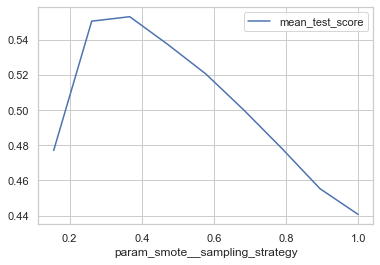

In [220]:
cv_results.plot(x='param_smote__sampling_strategy', y='mean_test_score')

In [221]:
pipe = make_pipeline(SMOTE(sampling_strategy=.37, k_neighbors=10),LogisticRegression(random_state=0))

# Fit..
#pipe.fit(X_train, y_train)
model_fit(pipe, scaled_X_train, y_train, scaled_X_test, y_test)

CV Score : Mean - 0.8825998 | Std - 0.005819611 | Min - 0.8751495 | Max - 0.8904067
Train AUC Score: 0.887113
Train Recall Score : 0.667305
F1 Recall Score : 0.558046
******* Train Confusion Matrix *********
[[20380  1513]
 [  695  1394]]
******* Train Classification Report *********
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     21893
           1       0.48      0.67      0.56      2089

    accuracy                           0.91     23982
   macro avg       0.72      0.80      0.75     23982
weighted avg       0.92      0.91      0.91     23982


Test AUC Score : 0.895856
Test Recall Score : 0.677932
F1 Recall Score : 0.566916
******* Test Confusion Matrix *********
[[5134  359]
 [ 162  341]]

******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5493
           1       0.49      0.68      0.57       503

    accuracy                

In [229]:
pipe = make_pipeline(SMOTE(sampling_strategy=1, k_neighbors=10),LogisticRegression(random_state=0))

# Fit..
#pipe.fit(X_train, y_train)
model_fit(pipe, scaled_X_train, y_train, scaled_X_test, y_test)

CV Score : Mean - 0.8854305 | Std - 0.005345451 | Min - 0.8766369 | Max - 0.8920653
Train AUC Score: 0.889591
Train Recall Score : 0.819052
F1 Recall Score : 0.443207
******* Train Confusion Matrix *********
[[17972  3921]
 [  378  1711]]
******* Train Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     21893
           1       0.30      0.82      0.44      2089

    accuracy                           0.82     23982
   macro avg       0.64      0.82      0.67     23982
weighted avg       0.92      0.82      0.85     23982


Test AUC Score : 0.899684
Test Recall Score : 0.825050
F1 Recall Score : 0.446477
******* Test Confusion Matrix *********
[[4552  941]
 [  88  415]]

******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5493
           1       0.31      0.83      0.45       503

    accuracy                

In [244]:
from imblearn.pipeline import Pipeline
#pipe = make_pipeline(SMOTE(),LogisticRegression())
pipe = Pipeline(steps=[('smote',ADASYN()),('logisticregression',LogisticRegression())])

k_values = list(range(5,25,5))

#pipe.fit(scaled_X_train, y_train)
#params = {'sampling__k_neighbors': list(range(5,25,5))}

gsc = GridSearchCV(
                    estimator=pipe,
                    param_grid={'smote__n_neighbors': k_values},
                    scoring='f1',
                    cv=5
                  )

gsc.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', ADASYN()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'smote__n_neighbors': [5, 10, 15, 20]}, scoring='f1')

In [246]:
# examine the best model
print(gsc.best_score_)
print(gsc.best_params_)
print(gsc.best_estimator_)

0.4070586708272823
{'smote__n_neighbors': 20}
Pipeline(steps=[('smote', ADASYN(n_neighbors=20)),
                ('logisticregression', LogisticRegression())])


In [248]:
pipe = make_pipeline(ADASYN(sampling_strategy=1, n_neighbors=20),LogisticRegression(random_state=0))

# Fit..
#pipe.fit(X_train, y_train)
model_fit(pipe, scaled_X_train, y_train, scaled_X_test, y_test)

CV Score : Mean - 0.8860178 | Std - 0.003936212 | Min - 0.8792074 | Max - 0.8902062
Train AUC Score: 0.890854
Train Recall Score : 0.853040
F1 Recall Score : 0.410174
******* Train Confusion Matrix *********
[[17075  4818]
 [  307  1782]]
******* Train Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     21893
           1       0.27      0.85      0.41      2089

    accuracy                           0.79     23982
   macro avg       0.63      0.82      0.64     23982
weighted avg       0.92      0.79      0.83     23982


Test AUC Score : 0.901672
Test Recall Score : 0.852883
F1 Recall Score : 0.407021
******* Test Confusion Matrix *********
[[4317 1176]
 [  74  429]]

******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      5493
           1       0.27      0.85      0.41       503

    accuracy                

## Step 5: Build interpretable model -

Below function will fit a model and return score and other model parameters -

In [149]:
def model_fit(model, xtrain, ytrain, xtest, ytest, performCV=True, cv_folds=5):
    model.fit(xtrain, ytrain)
    
    if performCV:
        cv_score = cross_val_score(model, xtrain, ytrain, cv=cv_folds, scoring='roc_auc')
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    dtrain_predprob = model.predict_proba(xtrain)[:,1]   
    print("Train AUC Score: %f" % metrics.roc_auc_score(ytrain, dtrain_predprob))
    dtrain_pred = model.predict(xtrain)
    print ("Train Recall Score : %f" % metrics.recall_score(ytrain, dtrain_pred))
    print ("F1 Recall Score : %f" % metrics.f1_score(ytrain, dtrain_pred))
    print('******* Train Confusion Matrix *********')
    print(confusion_matrix(ytrain, dtrain_pred))

    print('******* Train Classification Report *********')
    print(classification_report(ytrain, dtrain_pred))
    print()
    dtest_predprob = model.predict_proba(xtest)[:,1]
    print("Test AUC Score : %f" % metrics.roc_auc_score(ytest, dtest_predprob))
    dtest_pred = model.predict(xtest)
    # sensitivity:
    print ("Test Recall Score : %f" % metrics.recall_score(y_test, dtest_pred))
    print ("F1 Recall Score : %f" % metrics.f1_score(y_test, dtest_pred))
    print('******* Test Confusion Matrix *********')
    print(confusion_matrix(ytest, dtest_pred))
    print()
    print('******* Test Classification Report *********')
    print(classification_report(ytest, dtest_pred))

Below function will be used to find cutoff on predicted probabilities - 

In [71]:
def find_cutoff(model, xtrain, ytrain):
    y_train_pred = model.predict_proba(xtrain)[:,1]
    y_train_pred_final = pd.DataFrame({'Churn':ytrain.values, 'Churn_Prob':y_train_pred})
    y_train_pred_final['CustID'] = ytrain.index
    y_train_pred_final['predicted'] = model.predict(xtrain)
    
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
        
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [76]:
params = {
            'max_depth': range(5,16,2),
            'min_samples_leaf': [50,100,150,200,250,300,350,400],
            'n_estimators': [50,100,120,150,200,250,300]
         }

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
#grid_search = GridSearchCV(estimator=rf,
grid_search = RandomizedSearchCV(estimator=rf,
#                          param_grid = params,
                           param_distributions = params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring='roc_auc', return_train_score=True)

grid_search.fit(scaled_X_train1, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(5, 16, 2),
                                        'min_samples_leaf': [50, 100, 150, 200,
                                                             250, 300, 350,
                                                             400],
                                        'n_estimators': [50, 100, 120, 150, 200,
                                                         250, 300]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [77]:
# examine the best model
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9430329847258856
{'n_estimators': 120, 'min_samples_leaf': 50, 'max_depth': 15}
RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=120,
                       n_jobs=-1, random_state=42)


In [80]:
#rm01 = grid_search.best_estimator_
rm01 = RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=120,
                       n_jobs=-1, random_state=42)

model_fit(rm01, scaled_X_train1, y_train1, scaled_X_test, y_test)

CV Score : Mean - 0.943033 | Std - 0.001937467 | Min - 0.9410878 | Max - 0.9461146
Train AUC Score: 0.966199
Train Recall Score : 0.900862
******* Train Confusion Matrix *********
[[19810  2083]
 [ 2151 19546]]

Test AUC Score : 0.923999
Test Recall Score : 0.791252
******* Test Confusion Matrix *********
[[4952  541]
 [ 105  398]]


In [79]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,31.005774,0.198160,0.782446,0.101339,150,350,15,"{'n_estimators': 150, 'min_samples_leaf': 350,...",0.908552,0.901734,0.911022,0.903651,0.902171,0.905426,0.003700,7,0.914525,0.914493,0.913869,0.914522,0.914312,0.914344,0.000251
1,10.142593,3.632630,3.205731,2.004355,50,400,5,"{'n_estimators': 50, 'min_samples_leaf': 400, ...",0.893836,0.887188,0.895955,0.887873,0.884851,0.889941,0.004221,10,0.895729,0.895891,0.895177,0.895541,0.895257,0.895519,0.000271
2,40.799627,1.762197,3.916495,1.561692,120,50,15,"{'n_estimators': 120, 'min_samples_leaf': 50, ...",0.944457,0.941088,0.946115,0.941451,0.942055,0.943033,0.001937,1,0.966158,0.963780,0.962653,0.962874,0.962381,0.963569,0.001377


In [80]:
cv_results.loc[:,['param_n_estimators','param_min_samples_leaf','param_max_depth','mean_train_score','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,param_n_estimators,param_min_samples_leaf,param_max_depth,mean_train_score,mean_test_score
2,120,50,15,0.963569,0.943033
5,120,50,9,0.947019,0.930408
8,120,150,15,0.936697,0.923173
6,120,250,11,0.922876,0.912515
4,150,300,13,0.918567,0.908843
3,200,350,15,0.914398,0.905465
0,150,350,15,0.914344,0.905426
9,250,350,9,0.913321,0.904792
7,120,300,7,0.911659,0.903624
1,50,400,5,0.895519,0.889941


In [81]:
params = {
            'max_features': range(7,20,2),
         }

rf = RandomForestClassifier(n_estimators=120,min_samples_leaf=50,max_depth=15,random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf,
                           param_grid = params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring='roc_auc',return_train_score=True)
grid_search.fit(scaled_X_train1, y_train1)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  5.2min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=15, min_samples_leaf=50,
                                              n_estimators=120, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1, param_grid={'max_features': range(7, 20, 2)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [82]:
# examine the best model
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9466597629814475
{'max_features': 19}
RandomForestClassifier(max_depth=15, max_features=19, min_samples_leaf=50,
                       n_estimators=120, n_jobs=-1, random_state=42)


In [73]:
#rm02 = grid_search.best_estimator_
rm02 = RandomForestClassifier(max_depth=15, max_features=19, min_samples_leaf=50,
                       n_estimators=120, n_jobs=-1, random_state=42)
model_fit(rm02, scaled_X_train1, y_train1, scaled_X_test, y_test)

CV Score : Mean - 0.9466598 | Std - 0.001786536 | Min - 0.9445188 | Max - 0.9494315
Train AUC Score: 0.970466
Train Recall Score : 0.915933
******* Train Confusion Matrix *********
[[19874  2019]
 [ 1824 19873]]

Test AUC Score : 0.922503
Test Recall Score : 0.789264
******* Test Confusion Matrix *********
[[4943  550]
 [ 106  397]]


#### Finding Optimal Cutoff Point

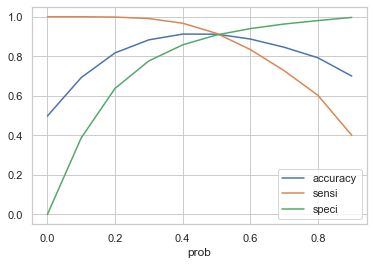

In [84]:
find_cutoff(rm02,scaled_X_train1,y_train1)

In [74]:
train_probs = rm02.predict_proba(scaled_X_train1)[:, 1]
train_preds = np.where(train_probs > 0.5, 1, 0)
print('************ Train  Report *************')
print ('Train Accuracy Score : %f' % metrics.accuracy_score(y_train1, train_preds)) 
print('Train AUC Score : %f' % metrics.roc_auc_score(y_train1, train_probs))
print ('Train Recall Score : %f' % metrics.recall_score(y_train1, train_preds) )
print('Train Confusion Matrix -')
print (confusion_matrix(list(y_train1), list(train_preds)))
print('******* Test Classification Report *********')
print(classification_report(y_train1, train_preds))
print()

print('************ Test  Report *************')


test_probs = rm02.predict_proba(scaled_X_test)[:, 1]
test_preds = np.where(test_probs > 0.5, 1, 0)
print ('Test Accuracy Score : %f' % metrics.accuracy_score(y_test, test_preds)) 
print("Test AUC Score : %f" % metrics.roc_auc_score(y_test, test_probs))
print ('Test Recall Score : %f' % metrics.recall_score(y_test, test_preds) )
print('Test Confusion Matrix -')
print (confusion_matrix(list(y_test), list(test_preds)))
print('******* Test Classification Report *********')
print(classification_report(y_test, test_preds))

************ Train  Report *************
Train Accuracy Score : 0.911838
Train AUC Score : 0.970466
Train Recall Score : 0.915933
Train Confusion Matrix -
[[19874  2019]
 [ 1824 19873]]
******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     21893
           1       0.91      0.92      0.91     21697

    accuracy                           0.91     43590
   macro avg       0.91      0.91      0.91     43590
weighted avg       0.91      0.91      0.91     43590


************ Test  Report *************
Test Accuracy Score : 0.890594
Test AUC Score : 0.922503
Test Recall Score : 0.789264
Test Confusion Matrix -
[[4943  550]
 [ 106  397]]
******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5493
           1       0.42      0.79      0.55       503

    accuracy                           0.89      5996
 

#### Apply RFE to eliminate redundant columns

In [82]:
from sklearn.feature_selection import RFE

In [83]:
rfe = RFE(estimator=rm02, n_features_to_select=30)
rfe = rfe.fit(scaled_X_train1, y_train1)

In [84]:
col = scaled_X_train1.columns[rfe.support_]
col

Index(['arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'sachet_2g_8', 'aon',
       'total_og_ic_mou_7', 'total_og_ic_mou_8', 'change_in_mou',
       'change_og_mou', 'change_in_og_ic_mou', 'change_in_rech_num',
       'change_in_rech_amt', 'change_in_vol_3g', 'change_arpu',
       'total_monthly_2g_3g_8'],
      dtype='object')

In [85]:
#rm02 = grid_search.best_estimator_
model_fit(rm02, scaled_X_train1[col], y_train1, scaled_X_test[col], y_test)

CV Score : Mean - 0.9467119 | Std - 0.002514094 | Min - 0.9428481 | Max - 0.9499233
Train AUC Score: 0.971783
Train Recall Score : 0.921786
******* Train Confusion Matrix *********
[[19835  2058]
 [ 1697 20000]]

Test AUC Score : 0.921954
Test Recall Score : 0.795229
******* Test Confusion Matrix *********
[[4915  578]
 [ 103  400]]


In [88]:
imp_df = pd.DataFrame({
                        'Varname': col,
                        'Imp': rm02.feature_importances_
                     })

imp_df.sort_values(by='Imp', ascending=False, inplace=True)
imp_df.reset_index(drop=True,inplace=True)
imp_df

,Varname,Imp
0,total_ic_mou_8,0.257394
1,total_og_ic_mou_8,0.131293
2,last_day_rch_amt_8,0.102393
3,change_in_og_ic_mou,0.084741
4,av_rech_amt_data_8,0.040205
5,aon,0.038271
6,change_in_rech_amt,0.035618
7,change_og_mou,0.029123
8,change_arpu,0.023868
9,max_rech_amt_8,0.022419


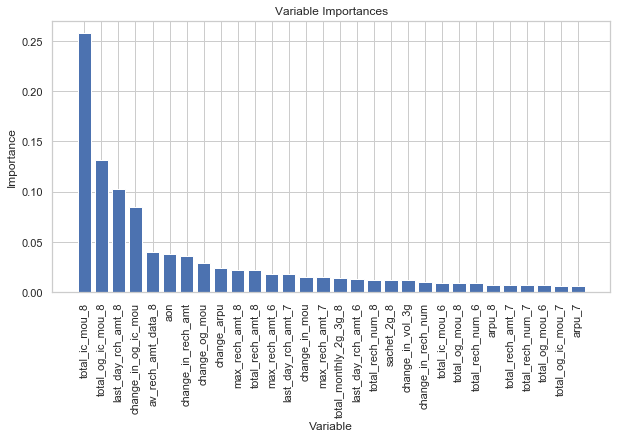

In [91]:
# Make a bar chart
plt.figure(figsize=(10,5))
plt.bar(imp_df.Varname,imp_df.Imp, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(imp_df.Varname, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

Given below are the important features - 

1. Incoming and outgoing minutes of usage for 8th month which should be significantly lower than good months
2. If the customer didn't rechange on 8th month, he/she may churn
3. Change of incoming/ outgoing usage in 8th month - the more the change, the higher possibility of churning
4. Average revenue for 8th month - if it is less for the 8th month, there is a possibility of churning
5. Change of incoming/ outgoing usage in 8th month - the more the change, the higher possibility of churning
6. Monthly 2g/ 3g usage gets reduced from average good time uage

## Step 6: Create high-performance model after doing PCA

#### PCA on the data

In [72]:
#scaled_X_train.shape
scaled_X_train1.shape

(43590, 65)

In [73]:
from sklearn.decomposition import PCA

In [74]:
# 0.9 -> amout of varience we want to capture (select variables which gives .9 variance of data)
pca = PCA(0.95)
df_train_pca2 = pca.fit_transform(scaled_X_train1)

print(df_train_pca2.shape)

(43590, 24)


In [95]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
per_var

array([19.8, 16.6, 12.9,  9.4,  6.2,  4.3,  3.6,  2.9,  2.5,  2.3,  2.3,
        2. ,  1.4,  1.2,  1.2,  1.1,  1. ,  0.9,  0.8,  0.7,  0.6,  0.6,
        0.6,  0.5])

In [96]:
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

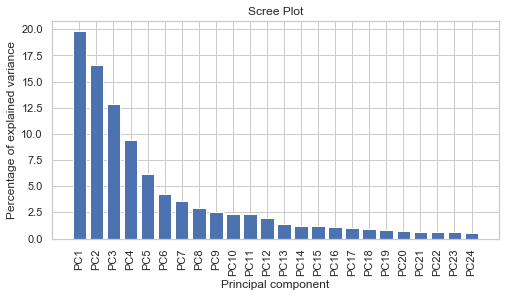

In [97]:
#plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
fig = plt.figure(figsize=[8,4])
plt.bar(x=labels, height=per_var)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal component')
plt.xticks(rotation='vertical')
plt.title('Scree Plot')
#plt.xticks(labels)
plt.show()

In [98]:
pca.components_[0].shape

(65,)

In [99]:
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

Explained variance: 0.9548


In [100]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.19819646, 0.36416285, 0.49350049, 0.58793738, 0.64974936,
       0.69255666, 0.72879234, 0.75790839, 0.78268793, 0.80554501,
       0.82815058, 0.84775101, 0.86225034, 0.87471093, 0.88652421,
       0.89796261, 0.90751452, 0.91691584, 0.92459165, 0.93161436,
       0.93799222, 0.94399431, 0.94951687, 0.95480033])

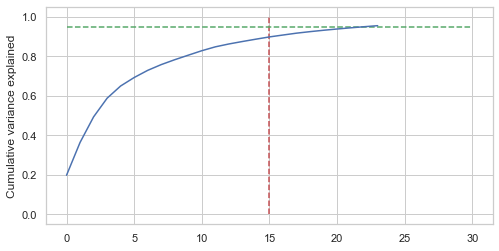

In [101]:
fig = plt.figure(figsize=[8,4])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [75]:
df_test_pca2 = pca.transform(scaled_X_test)

### Model01 - Applying Logistic Regression on the transformed data 

In [145]:
from sklearn.linear_model import LogisticRegression

In [100]:
logreg=LogisticRegression(random_state=0)
logreg.fit(df_train_pca2,y_train1)
print('Train Accuracy Score : %f' %logreg.score(df_train_pca2,y_train1))
train_preds=logreg.predict_proba(df_train_pca2)[:,1]
print ('Train AUC Score : %f' % metrics.roc_auc_score(y_train1, train_preds)) 

Train Accuracy Score : 0.790365
Train AUC Score : 0.860389


In [80]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

logreg=LogisticRegression(random_state=0)

grid_search = GridSearchCV(estimator=logreg,
                           param_grid = params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="roc_auc",return_train_score=True)
grid_search.fit(df_train_pca2, y_train1)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [81]:
# examine the best model
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.8470479328565774
{'C': 1000}
LogisticRegression(C=1000, random_state=0)


In [83]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.149972,0.015929,0.015628,0.000008,0.001,{'C': 0.001},0.802280,0.791291,0.798986,0.776677,0.785417,0.790930,0.009245,7,0.787916,0.791198,0.790326,0.794463,0.793539,0.791489,0.002335
1,0.181215,0.018747,0.015617,0.000004,0.01,{'C': 0.01},0.827784,0.816099,0.821467,0.804149,0.808610,0.815622,0.008522,6,0.813036,0.815799,0.815607,0.818438,0.819184,0.816412,0.002200
2,0.328047,0.022099,0.012497,0.006249,0.1,{'C': 0.1},0.852330,0.843344,0.841713,0.832556,0.829120,0.839813,0.008243,5,0.838671,0.839785,0.841475,0.842713,0.844650,0.841459,0.002113


In [86]:
cv_results.loc[:,['param_C','mean_train_score','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,param_C,mean_train_score,mean_test_score
6,1000,0.849265,0.847048
5,100,0.849260,0.847045
4,10,0.849216,0.847012
3,1,0.848655,0.846538
2,0.1,0.841459,0.839813
1,0.01,0.816412,0.815622
0,0.001,0.791489,0.790930


we will take C=1 for final model -

In [101]:
logreg01 = LogisticRegression(C=1,random_state=0)
model_fit(logreg01, df_train_pca2, y_train1, df_test_pca2, y_test)

CV Score : Mean - 0.8581467 | Std - 0.006324414 | Min - 0.8485794 | Max - 0.8679579
Train AUC Score: 0.860389
Train Recall Score : 0.809651
******* Train Confusion Matrix *********
[[16885  5008]
 [ 4130 17567]]

Test AUC Score : 0.894554
Test Recall Score : 0.858847
******* Test Confusion Matrix *********
[[4274 1219]
 [  71  432]]


#### Finding Optimal Cutoff Point

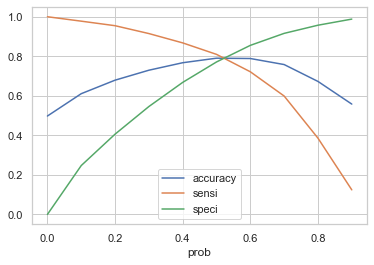

In [102]:
find_cutoff(logreg01,df_train_pca2,y_train1)

In [103]:
train_probs = logreg01.predict_proba(df_train_pca2)[:, 1]
train_preds = np.where(train_probs > 0.5, 1, 0)
print('************ Train  Report *************')
print ('Train Accuracy Score : %f' % metrics.accuracy_score(y_train1, train_preds)) 
print('Train AUC Score : %f' % metrics.roc_auc_score(y_train1, train_probs))
print ('Train Recall Score : %f' % metrics.recall_score(y_train1, train_preds) )
print('Train Confusion Matrix -')
print (confusion_matrix(list(y_train1), list(train_preds)))
print()
print('************ Test  Report *************')


test_probs = logreg01.predict_proba(df_test_pca2)[:, 1]
test_preds = np.where(test_probs > 0.5, 1, 0)
print ('Test Accuracy Score : %f' % metrics.accuracy_score(y_test, test_preds)) 
print("Test AUC Score : %f" % metrics.roc_auc_score(y_test, test_probs))
print ('Test Recall Score : %f' % metrics.recall_score(y_test, test_preds) )
print('Test Confusion Matrix -')
print (confusion_matrix(list(y_test), list(test_preds)))
print('******* Test Classification Report *********')
print(classification_report(y_test, test_preds))

************ Train  Report *************
Train Accuracy Score : 0.790365
Train AUC Score : 0.860389
Train Recall Score : 0.809651
Train Confusion Matrix -
[[16885  5008]
 [ 4130 17567]]

************ Test  Report *************
Test Accuracy Score : 0.784857
Test AUC Score : 0.894554
Test Recall Score : 0.858847
Test Confusion Matrix -
[[4274 1219]
 [  71  432]]
******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      5493
           1       0.26      0.86      0.40       503

    accuracy                           0.78      5996
   macro avg       0.62      0.82      0.63      5996
weighted avg       0.92      0.78      0.83      5996



### Model02 - Applying Random Forest on the transformed data 

In [104]:
params = {
        'max_depth': range(5,16,2),
        'min_samples_leaf': [50,100,150,200,250,300,350],
        'n_estimators': [50,100,120,150,200,250,300]
         }

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = RandomizedSearchCV(estimator=rf,
                           param_distributions  = params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="roc_auc",return_train_score=True)
grid_search.fit(df_train_pca2, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(5, 16, 2),
                                        'min_samples_leaf': [50, 100, 150, 200,
                                                             250, 300, 350],
                                        'n_estimators': [50, 100, 120, 150, 200,
                                                         250, 300]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [105]:
# examine the best model
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9073912256220517
{'n_estimators': 50, 'min_samples_leaf': 50, 'max_depth': 15}
RandomForestClassifier(max_depth=15, min_samples_leaf=50, n_estimators=50,
                       n_jobs=-1, random_state=42)


In [106]:
# cv results
cv_results1 = pd.DataFrame(grid_search.cv_results_)
cv_results1.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,33.538245,0.152388,1.090920,0.191772,150,350,15,"{'n_estimators': 150, 'min_samples_leaf': 350,...",0.881507,0.869153,0.875050,0.864316,0.863229,0.870651,0.006851,8,0.884821,0.886964,0.886418,0.888323,0.887595,0.886824,0.001187
1,25.329713,2.998621,4.271877,1.434804,100,150,11,"{'n_estimators': 100, 'min_samples_leaf': 150,...",0.897569,0.883045,0.887226,0.879355,0.877953,0.885030,0.007046,3,0.908547,0.909686,0.908597,0.911661,0.909466,0.909591,0.001130
2,24.044473,0.142731,0.922316,0.083869,100,300,13,"{'n_estimators': 100, 'min_samples_leaf': 300,...",0.883806,0.872655,0.876522,0.864995,0.865768,0.872749,0.007005,7,0.888444,0.891046,0.889836,0.891729,0.891363,0.890484,0.001202


In [107]:
cv_results1.loc[:,['param_n_estimators','param_min_samples_leaf','param_max_depth','mean_train_score','mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,param_n_estimators,param_min_samples_leaf,param_max_depth,mean_train_score,mean_test_score
8,50,50,15,0.947227,0.907391
7,150,100,13,0.923882,0.893691
1,100,150,11,0.909591,0.885030
4,50,150,9,0.904769,0.880861
5,150,200,9,0.899590,0.878175
3,250,250,9,0.894622,0.875302
2,100,300,13,0.890484,0.872749
0,150,350,15,0.886824,0.870651
9,300,250,5,0.875039,0.861869
6,200,350,5,0.872138,0.859889


In [108]:
rm02 = grid_search.best_estimator_
model_fit(rm02, df_train_pca2, y_train1, df_test_pca2, y_test)

CV Score : Mean - 0.9073912 | Std - 0.006938534 | Min - 0.9002565 | Max - 0.9194952
Train AUC Score: 0.949791
Train Recall Score : 0.877264
******* Train Confusion Matrix *********
[[19256  2637]
 [ 2663 19034]]

Test AUC Score : 0.902431
Test Recall Score : 0.807157
******* Test Confusion Matrix *********
[[4765  728]
 [  97  406]]


In [109]:
params = {
            'max_features': range(5,20,2),
         }

rf = RandomForestClassifier(n_estimators=50,min_samples_leaf=50,max_depth=15,random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf,
                           param_grid = params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="roc_auc",return_train_score=True)
grid_search.fit(df_train_pca2, y_train1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.0min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=15, min_samples_leaf=50,
                                              n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1, param_grid={'max_features': range(5, 20, 2)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [110]:
# examine the best model
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.911253440870533
{'max_features': 13}
RandomForestClassifier(max_depth=15, max_features=13, min_samples_leaf=50,
                       n_estimators=50, n_jobs=-1, random_state=42)


In [111]:
rm03 = grid_search.best_estimator_
model_fit(rm03, df_train_pca2, y_train1, df_test_pca2, y_test)

CV Score : Mean - 0.9112534 | Std - 0.007517702 | Min - 0.9037452 | Max - 0.9241176
Train AUC Score: 0.956484
Train Recall Score : 0.894686
******* Train Confusion Matrix *********
[[19252  2641]
 [ 2285 19412]]

Test AUC Score : 0.904833
Test Recall Score : 0.811133
******* Test Confusion Matrix *********
[[4763  730]
 [  95  408]]


#### Finding Optimal Cutoff Point

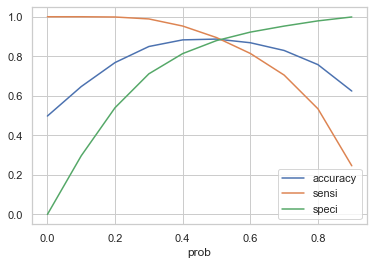

In [112]:
find_cutoff(rm03,df_train_pca2,y_train1)

In [113]:
#Take cutoff as .4 -
train_probs = rm03.predict_proba(df_train_pca2)[:, 1]
train_preds = np.where(train_probs > 0.5, 1, 0)
print('************ Train  Report *************')
print ('Train Accuracy Score : %f' % metrics.accuracy_score(y_train1, train_preds)) 
print('Train AUC Score : %f' % metrics.roc_auc_score(y_train1, train_probs))
print ('Train Recall Score : %f' % metrics.recall_score(y_train1, train_preds) )
print('Train Confusion Matrix -')
print (confusion_matrix(list(y_train1), list(train_preds)))
print()
print('************ Test  Report *************')


test_probs = rm03.predict_proba(df_test_pca2)[:, 1]
test_preds = np.where(test_probs > 0.5, 1, 0)
print ('Test Accuracy Score : %f' % metrics.accuracy_score(y_test, test_preds)) 
print("Test AUC Score : %f" % metrics.roc_auc_score(y_test, test_probs))
print ('Test Recall Score : %f' % metrics.recall_score(y_test, test_preds) )
print('Test Confusion Matrix -')
print (confusion_matrix(list(y_test), list(test_preds)))
print('******* Test Classification Report *********')
print(classification_report(y_test, test_preds))

************ Train  Report *************
Train Accuracy Score : 0.886992
Train AUC Score : 0.956484
Train Recall Score : 0.894686
Train Confusion Matrix -
[[19252  2641]
 [ 2285 19412]]

************ Test  Report *************
Test Accuracy Score : 0.862408
Test AUC Score : 0.904833
Test Recall Score : 0.811133
Test Confusion Matrix -
[[4763  730]
 [  95  408]]
******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      5493
           1       0.36      0.81      0.50       503

    accuracy                           0.86      5996
   macro avg       0.67      0.84      0.71      5996
weighted avg       0.93      0.86      0.88      5996



### Model03 - Applying GradientBoostingClassifier on the transformed data 

In [114]:
#Check a baseline model -
model = GradientBoostingClassifier()
model.fit(df_train_pca2, y_train1)
print('Training accuracy: ')
print(model.score(df_train_pca2, y_train1))
print('Testing accuracy: ')
print(model.score(df_test_pca2, y_test))
pred = model.predict(df_test_pca2)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(metrics.roc_auc_score(y_test, pred))

Training accuracy: 
0.8317962835512732
Testing accuracy: 
0.8233822548365577
[[4517  976]
 [  83  420]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      5493
           1       0.30      0.83      0.44       503

    accuracy                           0.82      5996
   macro avg       0.64      0.83      0.67      5996
weighted avg       0.92      0.82      0.86      5996

0.8286546875672961


**Tune hyperparameters for GBM**

In [131]:
params = {
            'max_depth': range(5,10,2),
            'min_samples_leaf': range(50,400,50),
            'min_samples_split': range(300,1000,200),
            'n_estimators': range(50,200,20)
         }

gbm = GradientBoostingClassifier(max_features='sqrt', random_state=10)

random_search = RandomizedSearchCV(estimator=gbm,
                           param_distributions = params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="roc_auc",return_train_score=True)

random_search.fit(df_train_pca2, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(max_features='sqrt',
                                                        random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(5, 10, 2),
                                        'min_samples_leaf': range(50, 400, 50),
                                        'min_samples_split': range(300, 1000, 200),
                                        'n_estimators': range(50, 200, 20)},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [132]:
# examine the best model
print(random_search.best_score_)
print(random_search.best_params_)
print(random_search.best_estimator_)

0.9382758585781446
{'n_estimators': 170, 'min_samples_split': 700, 'min_samples_leaf': 100, 'max_depth': 9}
GradientBoostingClassifier(max_depth=9, max_features='sqrt',
                           min_samples_leaf=100, min_samples_split=700,
                           n_estimators=170, random_state=10)


In [133]:
# cv results
rs_results2 = pd.DataFrame(random_search.cv_results_)
rs_results2.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,79.114366,0.964526,0.216290,0.013052,170,700,100,9,"{'n_estimators': 170, 'min_samples_split': 700...",0.946723,0.933951,0.941946,0.931585,0.937174,0.938276,0.005468,1,0.985968,0.986070,0.987128,0.986156,0.987228,0.986510,0.000550
1,38.954624,0.100594,0.094483,0.011851,130,700,50,5,"{'n_estimators': 130, 'min_samples_split': 700...",0.917394,0.902202,0.908588,0.901162,0.906314,0.907132,0.005797,7,0.940879,0.942580,0.940577,0.943375,0.943836,0.942250,0.001309
2,42.951466,0.741759,0.121167,0.005911,110,500,250,7,"{'n_estimators': 110, 'min_samples_split': 500...",0.928085,0.913046,0.920117,0.911353,0.915947,0.917710,0.005978,5,0.959432,0.958296,0.959215,0.962574,0.960374,0.959978,0.001457


In [134]:
rs_results1 = rs_results2.loc[:,['param_n_estimators','param_min_samples_split','param_min_samples_leaf','param_max_depth','mean_test_score','mean_train_score']]

In [135]:
rs_results1['score_diff'] = rs_results1['mean_train_score'] - rs_results1['mean_test_score']
rs_results1.sort_values(by='score_diff', ascending=True)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,mean_test_score,mean_train_score,score_diff
7,70,700,350,5,0.894443,0.920598,0.026155
3,110,700,200,5,0.903946,0.935336,0.031390
1,130,700,50,5,0.907132,0.942250,0.035118
5,110,300,50,5,0.906222,0.941775,0.035553
6,90,300,300,7,0.911264,0.950187,0.038923
2,110,500,250,7,0.917710,0.959978,0.042269
9,150,300,350,9,0.927755,0.973941,0.046187
0,170,700,100,9,0.938276,0.986510,0.048234
8,90,300,100,9,0.933815,0.982188,0.048373
4,150,300,200,9,0.938276,0.986758,0.048482


In [136]:
#we will take max_depth=5, n_estimators=110, min_samples_leaf=200 & min_samples_split=700 -
gbm02 = GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_leaf=200, min_samples_split=700,
                           n_estimators=110, random_state=10, subsample=0.8)

model_fit(gbm02, df_train_pca2, y_train1, df_test_pca2, y_test, performCV=False)

Train AUC Score: 0.931975
Train Recall Score : 0.873162
******* Train Confusion Matrix *********
[[18497  3396]
 [ 2752 18945]]

Test AUC Score : 0.902324
Test Recall Score : 0.834990
******* Test Confusion Matrix *********
[[4603  890]
 [  83  420]]


In [138]:
#Grid seach on subsample and max_features
param_test = {'max_features':range(5,22,2)}
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                            n_estimators=110,max_depth=5, 
                            min_samples_split=700, min_samples_leaf=200, 
                            subsample=0.8, random_state=10),
                           
                           param_grid = param_test, verbose=1, scoring='roc_auc',n_jobs=-1, cv=5)

grid_search.fit(df_train_pca2, y_train1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.5min finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=5,
                                                  min_samples_leaf=200,
                                                  min_samples_split=700,
                                                  n_estimators=110,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=-1, param_grid={'max_features': range(5, 22, 2)},
             scoring='roc_auc', verbose=1)

In [139]:
# examine the best model
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.9084770900526615
{'max_features': 19}
GradientBoostingClassifier(max_depth=5, max_features=19, min_samples_leaf=200,
                           min_samples_split=700, n_estimators=110,
                           random_state=10, subsample=0.8)


In [145]:
gbm03 = GradientBoostingClassifier(max_depth=5, max_features=19,
                           min_samples_leaf=200,min_samples_split=700,
                           n_estimators=110, random_state=10, subsample=0.8)

model_fit(gbm03, df_train_pca2, y_train1, df_test_pca2, y_test, performCV=False)

Train AUC Score: 0.940856
Train Recall Score : 0.885238
******* Train Confusion Matrix *********
[[18743  3150]
 [ 2490 19207]]

Test AUC Score : 0.907585
Test Recall Score : 0.829026
******* Test Confusion Matrix *********
[[4639  854]
 [  86  417]]


In [76]:
gbm03 = GradientBoostingClassifier(max_depth=5, max_features=19,
                           min_samples_leaf=200,min_samples_split=700,
                           n_estimators=110, random_state=10, subsample=0.8)

model_fit(gbm03, df_train_pca2, y_train1, df_test_pca2, y_test)

CV Score : Mean - 0.9084771 | Std - 0.006593459 | Min - 0.9025888 | Max - 0.9204388
Train AUC Score: 0.940856
Train Recall Score : 0.885238
******* Train Confusion Matrix *********
[[18743  3150]
 [ 2490 19207]]

Test AUC Score : 0.907585
Test Recall Score : 0.829026
******* Test Confusion Matrix *********
[[4639  854]
 [  86  417]]


In [140]:
gbm04 = GradientBoostingClassifier(max_depth=5, max_features=19,learning_rate=0.05,
                           min_samples_leaf=200,min_samples_split=700,
                           n_estimators=220, random_state=10, subsample=0.8)

model_fit(gbm04, df_train_pca2, y_train1, df_test_pca2, y_test, performCV=False)

Train AUC Score: 0.942325
Train Recall Score : 0.889247
******* Train Confusion Matrix *********
[[18800  3093]
 [ 2403 19294]]

Test AUC Score : 0.907518
Test Recall Score : 0.819085
******* Test Confusion Matrix *********
[[4660  833]
 [  91  412]]


**Considering ``gbm03`` as final GBM Model**

#### Finding Optimal Cutoff Point

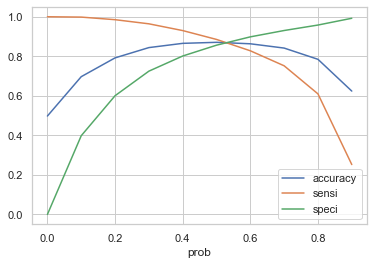

In [147]:
find_cutoff(gbm03,df_train_pca2,y_train1)

In [146]:
#Take cutoff as .4 -
train_probs = gbm03.predict_proba(df_train_pca2)[:, 1]
train_preds = np.where(train_probs > 0.5, 1, 0)
print('************ Train  Report *************')
print ('Train Accuracy Score : %f' % metrics.accuracy_score(y_train1, train_preds)) 
print('Train AUC Score : %f' % metrics.roc_auc_score(y_train1, train_probs))
print ('Train Recall Score : %f' % metrics.recall_score(y_train1, train_preds) )
print('Train Confusion Matrix -')
print (confusion_matrix(list(y_train1), list(train_preds)))
print()
print('************ Test  Report *************')


test_probs = gbm03.predict_proba(df_test_pca2)[:, 1]
test_preds = np.where(test_probs > 0.5, 1, 0)
print ('Test Accuracy Score : %f' % metrics.accuracy_score(y_test, test_preds)) 
print("Test AUC Score : %f" % metrics.roc_auc_score(y_test, test_probs))
print ('Test Recall Score : %f' % metrics.recall_score(y_test, test_preds) )
print('Test Confusion Matrix -')
print (confusion_matrix(list(y_test), list(test_preds)))
print('******* Test Classification Report *********')
print(classification_report(y_test, test_preds))

************ Train  Report *************
Train Accuracy Score : 0.870613
Train AUC Score : 0.940856
Train Recall Score : 0.885238
Train Confusion Matrix -
[[18743  3150]
 [ 2490 19207]]

************ Test  Report *************
Test Accuracy Score : 0.843229
Test AUC Score : 0.907585
Test Recall Score : 0.829026
Test Confusion Matrix -
[[4639  854]
 [  86  417]]
******* Test Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      5493
           1       0.33      0.83      0.47       503

    accuracy                           0.84      5996
   macro avg       0.65      0.84      0.69      5996
weighted avg       0.93      0.84      0.87      5996



##  Step 7: Model summary

In [148]:
model_params = pd.DataFrame(
                             {
                                'Model': ['Logistic Regression', 'Random Forest','Gradient Boosing'],
                                'Train_AUC': [.86, .96, .94],
                                'Train_Recall': [.81,.89,.89],
                                'Test_AUC': [.89, .90, .91],
                                'Test_Recall': [.86,.81,.83]
                             }
                           )

model_params.sort_values(by='Test_Recall', ascending=False, inplace=True)
model_params.reset_index(drop=True,inplace=True)
model_params

,Model,Train_AUC,Train_Recall,Test_AUC,Test_Recall
0,Logistic Regression,0.86,0.81,0.89,0.86
1,Gradient Boosing,0.94,0.89,0.91,0.83
2,Random Forest,0.96,0.89,0.90,0.81


##  Step 8: Strategies to manage customer churn

1. Since high value customers earn majority of revenue of the company, it should be ensured that these customers don't churn
2. Based on the analysis, following conditions may indicate the customer may churn -<br>
    a. Incoming/ outgoing usage drops for that month compared to average of previous months<br>
    b. 2g/ 3g usage drops for that month compared to average of previous months<br>
    c. Recharge amout drops for that month compared to average of previous months<br>
    d. If customer doesn't recharge in the month, may signal higher chance of churning<br>
3. If any of the above conditions met for a high value customer, steps should be taken to offer discount/ enquire of any issue customer may facing or not which may prevent the churn.